# Lichess Dataset Analysis Project

### Zachary MacTaggart

## Table of Contents

* [1. Pre-Exploration Work](#first-bullet)
    * [1.1 Importing Modules/Dataset, adding Dictionaries, and brief look at Dataset](#second-bullet)
    * [1.2 Adding New Columns and Mapping Dictionaries](#third-bullet)
    * [1.3 Finding Average Rating of Each Game](#fourth-bullet)
    * [1.4 Calculating Winrate of All Openings](#fifth-bullet)
    * [1.5 Creating Rating Difference Column and Filtering Out High Difference](#sixth-bullet)
* [2. Exploratory Analysis and Visualization](#seventh-bullet)
    * [2.1 Rating Visualizations](#eight-bullet)
    * [2.2 Frequency of Wins Loses and Draws](#ninth-bullet)
    * [2.3 Visualing Rating Difference](#tenth-bullet)
    * [2.4 Making Rating Difference Subsets to Calculate Winrates](#eleventh-bullet)
    * [2.5 Visualization of Rating Difference Against Number of Turns](#twelfth-bullet)
    * [2.6 Exploring Openings](#thirteenth-bullet)
* [3. Openings Analysis and Visualization](#fourteenth-bullet)
    * [3.1 Finding Popular Aggressive and Defensive Openings](#fifteenth-bullet)
    * [3.2 Looking at Openings In Different Rating Groups](#sixteenth-bullet)
    * [3.3 Checkmate Frequency Analysis](#seventeenth-bullet)
    * [3.4 Resign Frequency](#eighteenth-bullet)

## 1. Pre-Exploration Work <a class="anchor" id="first-bullet"></a>

### 1.1 Importing Modules/Dataset, adding Dictionaries, and brief look at Dataset <a class="anchor" id="second-bullet"></a>

In [1]:
# Importing modules used for this project

import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
plt.style.use('ggplot')


# Displaying max columns to see all columns in dataset used

pd.set_option('display.max_columns', None)


# Reading in CSV

df_chess = pd.read_csv('C:/Users/teste/OneDrive/Desktop/bootcamp_work/Project/games.csv')

## Source = https://www.kaggle.com/datasets/datasnaek/chess

In [2]:
df_chess.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

#### Explaing Dataset Columns:

<ins>id</ins>: game ID of the players

<ins>rated</ins>: True or False column if the match was rated or not

<ins>created_at</ins>: start time of the game

<ins>last_move_at</ins>: end time of the game

<ins>turns</ins>: how many turns the game had

<ins>victory_status</ins>: how the winning player won (checkmate, resign, or outoftime)

<ins>winner</ins>: what color the winner was

<ins>increment_code</ins>: what kind of time limit the game was (chess games can be a variety of time limits)

<ins>white_id</ins>: id of player playing with white pieces

<ins>black_id</ins>: id of player playing with black pieces

<ins>white_rating</ins>: rating score of player playing with white pieces

<ins>black_rating</ins>: rating score of player playing with black pieces

<ins>moves</ins>: all the moves of the chess game in chess notation (chess board is an 8x8 grid and moves are denoted e4, e5, etc.)

<ins>opening_eco</ins>: codes that refer to a specific opening rather than using a name

<ins>opening_name</ins>: name of the opening used

<ins>opening_ply</ins>: number of moves that were used in the opening

In [3]:
df_chess.head()

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4  
2   King's Pawn Game: Leonardis Variation            3  
3  Queen's Pawn Game: Zukertort Variation            3  
4                        Philidor Defense            5

In [4]:
# ChatGPT categorizing each opening into an aggressive or defensive playstyle, going to be used for mapping later on

categorized_openings = {
    'Slav Defense': 'Defensive',
    'Nimzowitsch Defense': 'Defensive',
    "King's Pawn Game": 'Aggressive',
    "Queen's Pawn Game": 'Aggressive',
    'Philidor Defense': 'Defensive',
    'Sicilian Defense': 'Defensive',
    'Blackmar-Diemer Gambit': 'Aggressive',
    'Italian Game': 'Defensive',
    'Scandinavian Defense': 'Defensive',
    "Van't Kruijs Opening": 'Aggressive',
    'French Defense': 'Defensive',
    'Four Knights Game': 'Aggressive',
    'Horwitz Defense': 'Defensive',
    'English Opening': 'Defensive',
    'Scotch Game': 'Defensive',
    "Queen's Gambit Refused": 'Defensive',
    "Queen's Gambit Accepted": 'Defensive',
    'Robatsch (Modern) Defense': 'Defensive',
    'Indian Game': 'Aggressive',
    'Dutch Defense': 'Defensive',
    'Zukertort Opening': 'Aggressive',
    'Vienna Game': 'Defensive',
    'Modern Defense': 'Defensive',
    'Queen\'s Pawn': 'Aggressive',
    'Crab Opening': 'Aggressive',
    "Queen's Indian Defense": 'Defensive',
    'Gruenfeld Defense': 'Defensive',
    "Queen's Gambit Declined": 'Defensive',
    'Yusupov-Rubinstein System': 'Defensive',
    'Ruy Lopez': 'Defensive',
    "Bishop's Opening": 'Aggressive',
    'Benoni Defense': 'Defensive',
    "King's Indian Attack": 'Aggressive',
    'Alekhine Defense': 'Defensive',
    'Caro-Kann Defense': 'Defensive',
    "Queen's Pawn Game #2": 'Aggressive',
    'Goldsmith Defense': 'Defensive',
    'Nimzo-Indian Defense': 'Defensive',
    'Bogo-Indian Defense': 'Defensive',
    "King's Knight Opening": 'Aggressive',
    'Amar Opening': 'Aggressive',
    'Paleface Attack': 'Aggressive',
    'Hungarian Opening': 'Aggressive',
    "Queen's Pawn Game #3": 'Aggressive',
    'Center Game': 'Aggressive',
    'Englund Gambit Declined |  Reversed French': 'Aggressive',
    'Giuoco Piano': 'Defensive',
    'Philidor Defense #4': 'Defensive',
    "Petrov's Defense": 'Defensive',
    'Russian Game': 'Defensive',
    'Pirc Defense #4': 'Defensive',
    'St. George Defense': 'Defensive',
    'Philidor Defense #2': 'Defensive',
    'Nimzo-Indian Defense #2': 'Defensive',
    'Bird Opening': 'Aggressive',
    'Owen Defense': 'Defensive',
    'Semi-Slav Defense': 'Defensive',
    'English Defense #2': 'Defensive',
    "King's Gambit Accepted |  Fischer Defense": 'Aggressive',
    "King's Gambit Accepted |  Schallopp Defense": 'Aggressive',
    "Petrov's Defense #5": 'Defensive',
    "King's Pawn Opening": 'Aggressive',
    'Polish Opening': 'Defensive',
    'Ponziani Opening': 'Defensive',
    "Petrov's Defense #2": 'Defensive',
    'East Indian Defense': 'Aggressive',
    "King's Gambit Accepted |  King's Knight Gambit": 'Aggressive',
    'Reti Opening': 'Defensive',
    'Nimzo-Larsen Attack': 'Defensive',
    'Center Game #2': 'Aggressive',
    'Torre Attack #2': 'Aggressive',
    'Creepy Crawly Formation': 'Aggressive',
    'Elephant Gambit': 'Aggressive',
    'Latvian Gambit': 'Aggressive',
    'Global Opening': 'Aggressive',
    "King's Gambit Accepted |  Bishop's Gambit |  Lopez Defense": 'Aggressive',
    "King's Gambit Accepted |  Bishop's Gambit": 'Aggressive',
    'Trompowsky Attack': 'Defensive',
    'Englund Gambit': 'Aggressive',
    'London System': 'Defensive',
    'Sicilian Defense #2': 'Defensive',
    'Pirc Defense': 'Defensive',
    "King's Gambit Declined |  Queen's Knight Defense": 'Defensive',
    'Danish Gambit Accepted |  Classical Defense': 'Aggressive',
    'Mieses Opening': 'Defensive',
    'Carr Defense': 'Defensive',
    "King's Indian Defense": 'Defensive',
    'Three Knights Opening': 'Aggressive',
    'Ware Opening': 'Defensive',
    'Budapest Defense': 'Defensive',
    'Richter-Veresov Attack': 'Aggressive',
    'Slav Defense #2': 'Defensive',
    'Franco-Benoni Defense': 'Defensive',
    'Van Geet Opening': 'Defensive',
    'Polish Defense': 'Defensive',
    "Petrov's Defense #3": 'Defensive',
    'Old Benoni Defense': 'Defensive',
    'Kadas Opening': 'Defensive',
    'Vienna Game #2': 'Defensive',
    'Pirc Defense #2': 'Defensive',
    'System': 'Defensive',
    'Three Knights Opening #2': 'Aggressive',
    'Pirc Defense #3': 'Defensive',
    'Blackmar-Diemer Gambit #2': 'Aggressive',
    'Rat Defense': 'Defensive',
    'Englund Gambit Complex': 'Aggressive',
    'Reti Opening #2': 'Defensive',
    "Gedult's Opening": 'Defensive',
    'Colle System': 'Defensive',
    'Nimzowitsch-Larsen Attack': 'Defensive',
    'Colle System #2': 'Defensive',
    "King's Gambit Declined |  Classical Variation": 'Defensive',
    'Neo-Gruenfeld Defense': 'Defensive',
    "King's Gambit": 'Aggressive',
    'Latvian Gambit Accepted': 'Aggressive',
    'English Defense': 'Defensive',
    'Grob Opening': 'Defensive',
    'Mikenas Defense': 'Defensive',
    'Tarrasch Defense': 'Defensive',
    'Old Indian Defense': 'Defensive',
    'Pirc Defense #5': 'Defensive',
    'Anderssen Opening': 'Defensive',
    'Latvian Gambit Accepted |  Main Line': 'Aggressive',
    'Caro-Kann Defense #2': 'Defensive',
    'Portuguese Opening': 'Defensive',
    "Queen's Gambit": 'Defensive',
    'Old Indian': 'Defensive',
    'Nimzowitsch Defense |  Declined Variation': 'Defensive',
    "King's Gambit Accepted |  MacLeod Defense": 'Aggressive',
    "King's Gambit Accepted |  Bishop's Gambit |  Maurian Defense": 'Aggressive',
    'Englund Gambit Declined |  Reversed Krebs': 'Aggressive',
    "King's Gambit Accepted |  Polerio Gambit": 'Aggressive',
    "King's Pawn": 'Aggressive',
    'Irish Gambit': 'Aggressive',
    "Queen's Pawn Opening": 'Aggressive',
    'Clemenz Opening': 'Defensive',
    'Blackmar-Diemer Gambit Declined |  Weinsbach Declination': 'Aggressive',
    'Mexican Defense': 'Defensive',
    'Barnes Defense': 'Defensive',
    'Saragossa Opening': 'Defensive',
    "King's Gambit Accepted |  Abbazia Defense": 'Aggressive',
    'Duras Gambit': 'Aggressive',
    "King's Gambit Accepted |  Becker Defense": 'Aggressive',
    'Gunderam Defense': 'Defensive',
    "King's Gambit Accepted |  Muzio Gambit |  Sarratt Defense": 'Aggressive',
    "King's Gambit Accepted": 'Aggressive',
    "King's Gambit Declined": 'Defensive',
    'Hippopotamus Defense #2': 'Defensive',
    'Catalan Opening': 'Defensive',
    'Danish Gambit Accepted': 'Aggressive',
    "King's Gambit Declined |  Mafia Defense": 'Defensive',
    "King's Gambit Accepted |  Cunningham Defense": 'Aggressive',
    'Torre Attack': 'Defensive',
    'Lion Defense': 'Defensive',
    'Danish Gambit Accepted |  Copenhagen Defense': 'Aggressive',
    'Guatemala Defense': 'Defensive',
    'Borg Defense': 'Defensive',
    'Sodium Attack': 'Aggressive',
    'Doery Defense': 'Defensive',
    'Benko Gambit Accepted |  Fianchetto Variation': 'Aggressive',
    "King's Gambit Declined |  Petrov's Defense": 'Defensive',
    'Amazon Attack': 'Aggressive',
    'Wade Defense': 'Defensive',
    'Kangaroo Defense': 'Defensive',
    'Semi-Bononi': 'Defensive',
    'Benko Gambit Accepted |  Fully Accepted Variation': 'Aggressive',
    'Benko Gambit Declined |  Quiet Line': 'Defensive',
    'Slav Indian': 'Defensive',
    'Slav Defense #3': 'Defensive',
    'Benko Gambit': 'Aggressive',
    'Petrov': 'Defensive',
    "King's Gambit |  Falkbeer Countergambit Accepted": 'Aggressive',
    "Petrov's Defense #4": 'Defensive',
    'Danish Gambit': 'Aggressive',
    "King's Gambit |  Falkbeer Countergambit |  Nimzowitsch-Marshall Countergambit": 'Aggressive',
    'Englund Gambit Declined |  Reversed Alekhine': 'Aggressive',
    "King's Gambit Accepted |  Kieseritzky Gambit |  Berlin Defense": 'Aggressive',
    'Englund Gambit Complex Declined': 'Aggressive',
    'Blumenfeld Countergambit Accepted': 'Aggressive',
    'Lemming Defense': 'Defensive',
    "King's Gambit Declined |  Norwalde Variation": 'Defensive',
    'Richter-Veresov Attack #2': 'Aggressive',
    "King's Gambit Accepted |  Modern Defense": 'Aggressive',
    "King's Gambit |  Falkbeer Countergambit |  Hinrichsen Gambit": 'Aggressive',
    "Queen's Indian Accelerated": 'Defensive',
    'Australian Defense': 'Defensive',
    'Ware Defense': 'Defensive',
    'Valencia Opening': 'Defensive',
    'Benko Gambit Declined |  Main Line': 'Defensive',
    'Scotch Gambit': 'Aggressive',
    'Benko Gambit Accepted |  Yugoslav |  without 7...Bxf1': 'Aggressive',
    'Old Benoni Defense #2': 'Defensive',
    'Blackmar-Diemer Gambit Declined |  Lamb Defense': 'Defensive',
    "King's Gambit Accepted |  Greco Gambit": 'Aggressive',
    "King's Gambit Accepted |  Bishop's Gambit |  Bogoljubov Variation": 'Aggressive',
    'Alekhine Defense #3': 'Defensive',
    'Czech Defense': 'Defensive',
    "King's Indian |  Orthodox |  7...Nbd7 8.Re1": 'Defensive',
    "King's Gambit Declined |  Keene Defense": 'Defensive',
    'Danish Gambit Accepted |  Schlechter Defense': 'Aggressive',
    "King's Gambit Accepted |  Hanstein Gambit": 'Aggressive',
    "King's Gambit Accepted |  Rosentreter Gambit": 'Aggressive',
    'Barnes Opening': 'Defensive',
    "King's Gambit Accepted |  Dodo Variation": 'Aggressive',
    'Center Game Accepted': 'Aggressive',
    "King's Gambit |  Falkbeer Countergambit |  Modern Transfer": 'Aggressive',
    'Danish Gambit Declined |  Sorensen Defense': 'Aggressive',
    'Benko Gambit Accepted |  Modern Variation': 'Aggressive',
    'Latvian Gambit Accepted |  Bilguer Variation': 'Aggressive',
    'Canard Opening': 'Defensive',
    'Blackmar-Diemer Gambit Declined |  Brombacher Countergambit': 'Aggressive',
    'Pterodactyl Defense': 'Aggressive',
    'Benko Gambit Declined |  Hjoerring Countergambit': 'Defensive',
    'Benko Gambit Accepted |  Pawn Return Variation': 'Aggressive',
    "King's Gambit Accepted |  Rosentreter-Testa Gambit": 'Aggressive',
    "King's Gambit Accepted |  Kieseritzky Gambit |  Kolisch Defense": 'Aggressive',
    "King's Gambit Accepted |  Salvio Gambit": 'Aggressive',
    "King's Gambit Accepted |  Ghulam-Kassim Gambit": 'Aggressive',
    "King's Gambit |  Falkbeer Countergambit |  Staunton Line": 'Aggressive',
    'Rubinstein Opening': 'Defensive',
    "King's Indian |  Fianchetto |  Classical Variation |  8.e4": 'Defensive',
    "King's Gambit Declined |  Miles Defense": 'Defensive',
    "King's Gambit |  Falkbeer Countergambit |  Miles Gambit": 'Aggressive',
}

In [5]:
# ChatGPT categorizing each opening into it's respective color, going to be used for mapping later on

openings_colors = {
    'Slav Defense': 'Black',
    'Nimzowitsch Defense': 'Black',
    "King's Pawn Game": 'White',
    "Queen's Pawn Game": 'White',
    'Philidor Defense': 'Black',
    'Sicilian Defense': 'Black',
    'Blackmar-Diemer Gambit': 'White',
    'Italian Game': 'White',
    'Scandinavian Defense': 'Black',
    "Van't Kruijs Opening": 'White',
    'French Defense': 'Black',
    'Four Knights Game': 'White',
    'Horwitz Defense': 'Black',
    'English Opening': 'White',
    'Scotch Game': 'White',
    "Queen's Gambit Refused": 'White',
    "Queen's Gambit Accepted": 'White',
    'Robatsch (Modern) Defense': 'Black',
    'Indian Game': 'White',
    'Dutch Defense': 'Black',
    'Zukertort Opening': 'White',
    'Vienna Game': 'White',
    'Modern Defense': 'Black',
    'Blumenfeld Countergambit #2': 'White',
    "Queen's Pawn": 'White',
    'Crab Opening': 'White',
    "Queen's Indian Defense": 'White',
    'Gruenfeld Defense': 'Black',
    "Queen's Gambit Declined": 'White',
    'Yusupov-Rubinstein System': 'White',
    'Ruy Lopez': 'White',
    "Bishop's Opening": 'White',
    'Benoni Defense': 'Black',
    "King's Indian Attack": 'White',
    'Alekhine Defense #2': 'Black',
    'Alekhine Defense': 'Black',
    'Caro-Kann Defense': 'Black',
    "Queen's Pawn Game #2": 'White',
    'Goldsmith Defense': 'Black',
    'Nimzo-Indian Defense': 'Black',
    'Bogo-Indian Defense': 'White',
    "King's Knight Opening": 'White',
    'Amar Opening': 'White',
    'Paleface Attack': 'White',
    'Hungarian Opening': 'White',
    "Queen's Pawn Game #3": 'White',
    'Center Game': 'White',
    'Englund Gambit Declined |  Reversed French': 'White',
    'Giuoco Piano': 'White',
    'Philidor Defense #4': 'Black',
    "Petrov's Defense": 'Black',
    'Russian Game': 'White',
    'Pirc Defense #4': 'Black',
    'St. George Defense': 'Black',
    'Philidor Defense #2': 'Black',
    'Nimzo-Indian Defense #2': 'Black',
    'Bird Opening': 'White',
    'Owen Defense': 'Black',
    'Semi-Slav Defense': 'Black',
    'English Defense #2': 'Black',
    "King's Gambit Accepted |  Fischer Defense": 'White',
    "King's Gambit Accepted |  Schallopp Defense": 'White',
    "Petrov's Defense #5": 'Black',
    "King's Pawn Opening": 'White',
    'Polish Opening': 'White',
    'Ponziani Opening': 'White',
    "Petrov's Defense #2": 'Black',
    'East Indian Defense': 'White',
    "King's Gambit Accepted |  King's Knight Gambit": 'White',
    'Reti Opening': 'White',
    'Nimzo-Larsen Attack': 'White',
    'Center Game #2': 'White',
    'Torre Attack #2': 'White',
    'Creepy Crawly Formation': 'White',
    'Elephant Gambit': 'White',
    'Latvian Gambit': 'White',
    'Global Opening': 'White',
    "King's Gambit Accepted |  Bishop's Gambit |  Lopez Defense": 'White',
    "King's Gambit Accepted |  Bishop's Gambit": 'White',
    'Trompowsky Attack': 'White',
    'Englund Gambit': 'White',
    'London System': 'White',
    'Sicilian Defense #2': 'Black',
    'Pirc Defense': 'Black',
    "King's Gambit Declined |  Queen's Knight Defense": 'White',
    'Danish Gambit Accepted |  Classical Defense': 'White',
    'Mieses Opening': 'White',
    'Carr Defense': 'White',
    "King's Indian Defense": 'Black',
    'Three Knights Opening': 'White',
    'Ware Opening': 'White',
    'Budapest Defense': 'Black',
    'Richter-Veresov Attack': 'White',
    'Slav Defense #2': 'Black',
    'Franco-Benoni Defense': 'Black',
    'Van Geet Opening': 'White',
    'Polish Defense': 'Black',
    "Petrov's Defense #3": 'Black',
    'Old Benoni Defense': 'Black',
    'Kadas Opening': 'White',
    'Vienna Game #2': 'White',
    'Pirc Defense #2': 'Black',
    'System': 'White',
    'Three Knights Opening #2': 'White',
    'Pirc Defense #3': 'Black',
    'Blackmar-Diemer Gambit #2': 'White',
    'Rat Defense': 'Black',
    'Englund Gambit Complex': 'White',
    'Reti Opening #2': 'White',
    "Gedult's Opening": 'White',
    'Colle System': 'White',
    'Nimzowitsch-Larsen Attack': 'White',
    'Colle System #2': 'White',
    "King's Gambit Declined |  Classical Variation": 'White',
    'Neo-Gruenfeld Defense': 'Black',
    "King's Gambit": 'White',
    'Latvian Gambit Accepted': 'White',
    'English Defense': 'Black',
    'Grob Opening': 'White',
    'Mikenas Defense': 'White',
    'Tarrasch Defense': 'White',
    'Old Indian Defense': 'Black',
    'Pirc Defense #5': 'Black',
    'Anderssen Opening': 'White',
    'Latvian Gambit Accepted |  Main Line': 'White',
    'Caro-Kann Defense #2': 'Black',
    'Portuguese Opening': 'White',
    "Queen's Gambit": 'White',
    'Old Indian': 'Black',
    'Nimzowitsch Defense |  Declined Variation': 'Black',
    "King's Gambit Accepted |  MacLeod Defense": 'White',
    "King's Gambit Accepted |  Bishop's Gambit |  Maurian Defense": 'White',
    'Englund Gambit Declined |  Reversed Krebs': 'White',
    "King's Gambit Accepted |  Polerio Gambit": 'White',
    "King's Pawn": 'White',
    'Irish Gambit': 'White',
    "Queen's Pawn Opening": 'White',
    'Clemenz Opening': 'White',
    'Blackmar-Diemer Gambit Declined |  Weinsbach Declination': 'White',
    'Mexican Defense': 'White',
    'Barnes Defense': 'White',
    'Saragossa Opening': 'White',
    "King's Gambit Accepted |  Abbazia Defense": 'White',
    'Duras Gambit': 'White',
    "King's Gambit Accepted |  Becker Defense": 'White',
    'Gunderam Defense': 'White',
    "King's Gambit Accepted |  Muzio Gambit |  Sarratt Defense": 'White',
    "King's Gambit Accepted": 'White',
    "King's Gambit Declined": 'White',
    'Hippopotamus Defense #2': 'Black',
    'Catalan Opening': 'White',
    'Danish Gambit Accepted': 'White',
    "King's Gambit Declined |  Mafia Defense": 'White',
    "King's Gambit Accepted |  Cunningham Defense": 'White',
    'Torre Attack': 'White',
    'Lion Defense': 'Black',
    'Danish Gambit Accepted |  Copenhagen Defense': 'White',
    'Guatemala Defense': 'White',
    'Borg Defense': 'White',
    'Sodium Attack': 'White',
    'Doery Defense': 'White',
    'Benko Gambit Accepted |  Fianchetto Variation': 'Black',
    "King's Gambit Declined |  Petrov's Defense": 'White',
    'Amazon Attack': 'White',
    'Wade Defense': 'White',
    'Kangaroo Defense': 'White',
    'Semi-Bononi': 'White',
    'Benko Gambit Accepted |  Fully Accepted Variation': 'Black',
    'Benko Gambit Declined |  Quiet Line': 'White',
    'Slav Indian': 'Black',
    'Slav Defense #3': 'Black',
    'Benko Gambit': 'Black',
    'Petrov': 'Black',
    "King's Gambit |  Falkbeer Countergambit Accepted": 'White',
    "Petrov's Defense #4": 'Black',
    'Danish Gambit': 'White',
    "King's Gambit |  Falkbeer Countergambit |  Nimzowitsch-Marshall Countergambit": 'White',
    'Englund Gambit Declined |  Reversed Alekhine': 'White',
    "King's Gambit Accepted |  Kieseritzky Gambit |  Berlin Defense": 'White',
    'Englund Gambit Complex Declined': 'White',
    'Blumenfeld Countergambit Accepted': 'White',
    'Lemming Defense': 'White',
    "King's Gambit Declined |  Norwalde Variation": 'White',
    'Richter-Veresov Attack #2': 'White',
    "King's Gambit Accepted |  Modern Defense": 'White',
    "King's Gambit |  Falkbeer Countergambit |  Hinrichsen Gambit": 'White',
    "Queen's Indian Accelerated": 'White',
    'Australian Defense': 'Black',
    'Ware Defense': 'White',
    'Valencia Opening': 'White',
    'Benko Gambit Declined |  Main Line': 'White',
    'Scotch Gambit': 'White',
    'Benko Gambit Accepted |  Yugoslav |  without 7...Bxf1': 'Black',
    'Old Benoni Defense #2': 'Black',
    'Blackmar-Diemer Gambit Declined |  Lamb Defense': 'White',
    "King's Gambit Accepted |  Greco Gambit": 'White',
    "King's Gambit Accepted |  Bishop's Gambit |  Bogoljubov Variation": 'White',
    'Alekhine Defense #3': 'Black',
    'Czech Defense': 'Black',
    "King's Indian |  Orthodox |  7...Nbd7 8.Re1": 'White',
    "King's Gambit Declined |  Keene Defense": 'White',
    'Danish Gambit Accepted |  Schlechter Defense': 'White',
    "King's Gambit Accepted |  Hanstein Gambit": 'White',
    "King's Gambit Accepted |  Rosentreter Gambit": 'White',
    'Barnes Opening': 'White',
    "King's Gambit Accepted |  Dodo Variation": 'White',
    'Center Game Accepted': 'White',
    "King's Gambit |  Falkbeer Countergambit |  Modern Transfer": 'White',
    'Danish Gambit Declined |  Sorensen Defense': 'White',
    'Benko Gambit Accepted |  Modern Variation': 'Black',
    'Latvian Gambit Accepted |  Bilguer Variation': 'Black',
    'Canard Opening': 'White',
    'Blackmar-Diemer Gambit Declined |  Brombacher Countergambit': 'White',
    'Pterodactyl Defense': 'White',
    'Benko Gambit Declined |  Hjoerring Countergambit': 'White',
    'Benko Gambit Accepted |  Pawn Return Variation': 'Black',
    "King's Gambit Accepted |  Rosentreter-Testa Gambit": 'White',
    "King's Gambit Accepted |  Kieseritzky Gambit |  Kolisch Defense": 'White',
    "King's Gambit Accepted |  Salvio Gambit": 'White',
    "King's Gambit Accepted |  Ghulam-Kassim Gambit": 'White',
    "King's Gambit |  Falkbeer Countergambit |  Staunton Line": 'White',
    'Rubinstein Opening': 'White',
    "King's Indian |  Fianchetto |  Classical Variation |  8.e4": 'White',
    "King's Gambit Declined |  Miles Defense": 'White',
    "King's Gambit |  Falkbeer Countergambit |  Miles Gambit": 'White'
}

### 1.2 Adding New Columns and Mapping Dictionaries <a class="anchor" id="third-bullet"></a>

Mapping the above Dicitionaries to new columns and splitting the opening column into two new columns.

In [6]:
# Splitting the opening column into two different columns, opening and variation

# Splitting will allow me to work with just openings or just variations when needed

df_chess[['opening_new', 'variation_new']] = df_chess['opening_name'].str.split(':', 1, expand=True)

C:\Users\teste\AppData\Local\Temp\ipykernel_4108\1417141768.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_chess[['opening_new', 'variation_new']] = df_chess['opening_name'].str.split(':', 1, expand=True)


In [7]:
# Making a list of all unique openings

# Used for mapping the above dictionaries + seeing all openings used in the dataset

openings_list = df_chess['opening_new'].unique().tolist()

In [8]:
# Mapping the above dicitionary "categorized openings" to dataset on opening_new

# Creates a new column called 'style' and adds aggressive or defensive in that column depending on the style of the opening

df_chess['style'] = df_chess['opening_new'].map(categorized_openings)

In [9]:
# Mapping the other dictionary "openings_colors" to dataset on opening_new

#Creates a new column called 'opening_color' which adds the color of the opening to the dataset

df_chess['opening_color'] = df_chess['opening_new'].map(openings_colors)

### 1.3 Finding Average Rating of Each Game <a class="anchor" id="fourth-bullet"></a>

Finding the average rating per game to look at the quantiles of rating. Going to use those quantiles to split up the ratings into groups to use for analysis. Going to to be looking at chess opening winrates later on, and would to see if there are any large differences in winrates/openings/styles between rating groups.

In [10]:
# Making a column called 'avg_rating' using the average of white and black rating per game

df_chess['avg_rating'] = (df_chess['white_rating'] + df_chess['black_rating']) / 2

In [11]:
# Finding quantiles to split dataframe into skill level groups

df_chess['avg_rating'].describe()


# 0-25% = 0-1406 (BEGINNER) 
# 25-50% = 1406-1578 (INTERMEDIATE)
# 50-75% = 1578-1771 (ADVANCED)
# 75%-100% = 1771 + (MASTER)

# Names are arbitrary 

count    20058.000000
mean      1592.731927
std        263.173825
min        816.500000
25%       1406.500000
50%       1568.750000
75%       1771.000000
max       2475.500000
Name: avg_rating, dtype: float64

In [12]:
#Finding top 10% Rating Group

top_10_percentile = df_chess['avg_rating'].quantile(0.90)
top_10_percentile

1952.5

In [13]:
# Using quantiles to make two lists for the bin cut offs and the labels for the rating groups

rating_cutoffs = [0, 1406, 1578, 1771, 1952.5, 3000]
rating_labels = ['Beginner', 'Intermediate', 'Advanced', 'Master', 'Top 10%']

In [14]:
# creating new column called rating_group using bins/labels

df_chess['rating_group'] = pd.cut(df_chess['avg_rating'], bins=rating_cutoffs, labels=rating_labels, right=False)

In [15]:
# Filtering out duplicate games

df_chess = df_chess.drop_duplicates(subset='id', keep='first')

In [16]:
df_chess #checking difference

id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating            black_id  \
0      white           15+2       bourgris          1500                a-00   
1      black           5+10           a-00          1322           skinnerua   
2      white           5+10         ischia          1496                a-00   
3      white           20+0  daniamurashov          1439        adivanov2009   
4      white           30+3      nik221107          1523        adivanov2009   
...      ...            ...            ...           ...                 ...   
20053  white          10+10        belcolt          1691            jamboger   
20054  black           10+0       jamboger          1233  farrukhasomiddinov   
20055  white           10+0       jamboger          1219        schaaksmurf3   
20056  white           10+0   marcodisogno          1360            jamboger   
20057  black           10+0       jamboger          1235               ffbob   

       black_rating                                              moves  \
0              1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1              1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2              1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3              1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4              1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   
...             ...                                                ...   
20053          1220  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...   
20054          1196  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...   
20055          1286  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...   
20056          1227  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...   
20057          1339  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...   

      opening_eco                            opening_name  opening_ply  \
0             D10        Slav Defense: Exchange Variation            5   
1             B00  Nimzowitsch Defense: Kennedy Variation            4   
2             C20   King's Pawn Game: Leonardis Variation            3   
3             D02  Queen's Pawn Game: Zukertort Variation            3   
4             C41                        Philidor Defense            5   
...           ...                                     ...          ...   
20053         A80                           Dutch Defense            2   
20054         A41                            Queen's Pawn            2   
20055         D00         Queen's Pawn Game: Mason Attack            3   
20056         B07                            Pirc Defense            4   
20057         D00         Queen's Pawn Game: Mason Attack            3   

               opening_new         variation_new       style opening_color  \
0             Slav Defense    Exchange Variation   Defensive         Black   
1      Nimzowitsch Defense     Kennedy Variation   Defensive         Black   
2         King's Pawn Game   Leonardis Variation  Aggressive         White   
3        Queen's Pawn Game   Zukertort Variation 

 ### 1.4 Calculating Winrate of All Openings <a class="anchor" id="fifth-bullet"></a>

Using functions to calculate winrate of each opening. Functions are explained with attached docstring. Some are probably not necessary but allowed me to practice making my own functions that use dataframes as input.  

In [17]:
def match_wins(df):
    """
    Function that creates a new column called win_lose. 
    
    Default value is 0.
    
    If the winner color matches the opening color the value is 1.
    
    Used to help prep before calculating winrates.
    
    Args:
        A dataframe.
    
    Returns:
        Dataframe with the new column.
        
    """
    
    df['win_lose'] = 0
    df_chess.loc[df_chess['winner'].str.lower() == df_chess['opening_color'].str.lower(), 'win_lose'] = 1

In [18]:
match_wins(df_chess)

In [19]:
def calc_wr(df):
    """
    Function that calculates the winrates. 
    Groups the dataframe by opening and win_lose values.
    Applies the mean to the win_lose column in a dataframe.
    
    Args:
        A dataframe.
    
    Returns:
        A pandas series of openings with their associated winrates.
        
    """
    
    wr = df.groupby('opening_new')['win_lose'].mean()
    return wr

In [20]:
wr = calc_wr(df_chess)
wr

opening_new
Alekhine Defense             0.410112
Alekhine Defense #2          0.333333
Alekhine Defense #3          1.000000
Amar Opening                 0.500000
Amazon Attack                0.333333
                               ...   
Wade Defense                 0.500000
Ware Defense                 0.666667
Ware Opening                 0.375000
Yusupov-Rubinstein System    0.473684
Zukertort Opening            0.540268
Name: win_lose, Length: 227, dtype: float64

In [21]:
# Creating a dataframe of openings and winrates from previous functions results

df_wr = pd.DataFrame({'opening': wr.index, 'winrate': wr.values})
df_wr

opening   winrate
0             Alekhine Defense  0.410112
1          Alekhine Defense #2  0.333333
2          Alekhine Defense #3  1.000000
3                 Amar Opening  0.500000
4                Amazon Attack  0.333333
..                         ...       ...
222               Wade Defense  0.500000
223               Ware Defense  0.666667
224               Ware Opening  0.375000
225  Yusupov-Rubinstein System  0.473684
226          Zukertort Opening  0.540268

[227 rows x 2 columns]

In [22]:
def opening_count(df):
    """
    Function that calculates the counts of the openings. 
    
    Args:
        A dataframe.
    
    Returns:
        A pandas series of openings with their associated value count.
        
    """
    
    opening_counts = df['opening_new'].value_counts()
    return opening_counts

In [23]:
counts_ = opening_count(df_chess)

In [24]:
# Turning the counts into a dataframe

df_counts = pd.DataFrame({'opening': counts_.index, 'games_played': counts_.values})

In [25]:
# Merging the count dataframe onto openings of the winrate dataframe

df_wr_counts = pd.merge(df_wr, df_counts, on='opening')

In [26]:
### Table with ALL Openings and Winrates but NO FILTERING YET(!) ###

df_wr_counts # seeing how the new DF looks, going to merge this to original chess dataframe so its more usable

opening   winrate  games_played
0             Alekhine Defense  0.410112           178
1          Alekhine Defense #2  0.333333             3
2          Alekhine Defense #3  1.000000             1
3                 Amar Opening  0.500000            12
4                Amazon Attack  0.333333             6
..                         ...       ...           ...
222               Wade Defense  0.500000             2
223               Ware Defense  0.666667            12
224               Ware Opening  0.375000            24
225  Yusupov-Rubinstein System  0.473684            19
226          Zukertort Opening  0.540268           298

[227 rows x 3 columns]

In [27]:
# Renaming the new dataframe opening column to opening_new to match original dataframe

df_wr_counts = df_wr_counts.rename(columns={'opening': 'opening_new'})

In [28]:
# Merging/left-joining the new dataframe and the original dataframe on opening_new, retaining the columns from the new df

df_chess = df_chess.merge(df_wr_counts, on='opening_new', how='left')

### 1.5 Creating Rating Difference Column and Filtering Out High Difference <a class="anchor" id="sixth-bullet"></a>

Looking into the rating difference between players. Important to look at to ensure I am analyzing fair games.

In [29]:
# Calculating rating difference by subracting white from black, black from white would also work just changes sign
# Adding it as a column to the original dataframe

df_chess['rating_difference'] = df_chess.loc[:,'white_rating'] - df_chess.loc[:,'black_rating']

In [30]:
# Subsetting the dataframe to only include rated games
# Non-rated games might have players not as serious and using openings they would usually not play competitively

df_rated = df_chess[df_chess['rated'] == True]

In [31]:
# Finding the absolute value of rating difference

df_rated['rating_difference_abs'] = df_rated['rating_difference'].abs()
rating_difference_abs = df_rated['rating_difference_abs']

C:\Users\teste\AppData\Local\Temp\ipykernel_4108\2185037275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['rating_difference_abs'] = df_rated['rating_difference'].abs()


In [32]:
# Filtering df_rated to only show games under/equal to a rating difference of 450 points

df_rated_fixed = df_chess[(df_chess['rated'] == True) & 
                          df_rated["rating_difference_abs" ] <= 479 
                          & ~df_chess.duplicated(subset='id', keep=False)]

In [33]:
# Re-adding rating difference in absolute value as a column to the df_rated_fixed column

df_rated_fixed['rating_difference_abs'] = df_rated_fixed['rating_difference'].abs()

In [34]:
df_rated_fixed # Checking new DF to make sure the rating differences are under 450

id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
19108  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
19109  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
19110  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
19111  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
19112  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating            black_id  \
0      white           15+2       bourgris          1500                a-00   
1      black           5+10           a-00          1322           skinnerua   
2      white           5+10         ischia          1496                a-00   
3      white           20+0  daniamurashov          1439        adivanov2009   
4      white           30+3      nik221107          1523        adivanov2009   
...      ...            ...            ...           ...                 ...   
19108  white          10+10        belcolt          1691            jamboger   
19109  black           10+0       jamboger          1233  farrukhasomiddinov   
19110  white           10+0       jamboger          1219        schaaksmurf3   
19111  white           10+0   marcodisogno          1360            jamboger   
19112  black           10+0       jamboger          1235               ffbob   

       black_rating                                              moves  \
0              1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1              1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2              1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3              1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4              1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   
...             ...                                                ...   
19108          1220  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...   
19109          1196  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...   
19110          1286  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...   
19111          1227  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...   
19112          1339  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...   

      opening_eco                            opening_name  opening_ply  \
0             D10        Slav Defense: Exchange Variation            5   
1             B00  Nimzowitsch Defense: Kennedy Variation            4   
2             C20   King's Pawn Game: Leonardis Variation            3   
3             D02  Queen's Pawn Game: Zukertort Variation            3   
4             C41                        Philidor Defense            5   
...           ...                                     ...          ...   
19108         A80                           Dutch Defense            2   
19109         A41                            Queen's Pawn            2   
19110         D00         Queen's Pawn Game: Mason Attack            3   
19111         B07                            Pirc Defense            4   
19112         D00         Queen's Pawn Game: Mason Attack            3   

               opening_new         variation_new       style opening_color  \
0             Slav Defense    Exchange Variation   Defensive         Black   
1      Nimzowitsch Defense     Kennedy Variation   Defensive         Black   
2         King's Pawn Game   Leonardis Variation  Aggressive         White   
3        Queen's Pawn Game   Zukertort Variation 

In [35]:
# Making a number of turns subset to use for a future scatterplot

number_of_turns = df_rated['turns']

In [36]:
df_chess.head(20) # checking completed dataframe to make sure it looks good

id  rated    created_at  last_move_at  turns victory_status winner  \
0   TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1   l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2   mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3   kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4   9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   
5   MsoDV9wj  False  1.504240e+12  1.504240e+12      5           draw   draw   
6   qwU9rasv   True  1.504230e+12  1.504230e+12     33         resign  white   
7   RVN0N3VK  False  1.503680e+12  1.503680e+12      9         resign  black   
8   dwF3DJHO   True  1.503510e+12  1.503510e+12     66         resign  black   
9   afoMwnLg   True  1.503440e+12  1.503440e+12    119           mate  white   
10  HgKLWPsz  False  1.503350e+12  1.503350e+12     39           mate  white   
11  Vf5fKWzI  False  1.503350e+12  1.503350e+12     38         resign  black   
12  HRti5mKv  False  1.503350e+12  1.503350e+12     60         resign  black   
13  2fEjSei6  False  1.503340e+12  1.503340e+12     31         resign  black   
14  u7i6dOaJ  False  1.504090e+12  1.504100e+12     31           mate  white   
15  guanvMR5  False  1.504090e+12  1.504090e+12     43         resign  black   
16  PmpkWkmm  False  1.504090e+12  1.504090e+12     52         resign  black   
17  EwaK0IsE  False  1.504010e+12  1.504010e+12     66           mate  black   
18  yrSDozT3  False  1.504010e+12  1.504010e+12    101         resign  black   
19  x31mXlvc  False  1.503760e+12  1.503760e+12     25         resign  white   

   increment_code            white_id  white_rating            black_id  \
0            15+2            bourgris          1500                a-00   
1            5+10                a-00          1322           skinnerua   
2            5+10              ischia          1496                a-00   
3            20+0       daniamurashov          1439        adivanov2009   
4            30+3           nik221107          1523        adivanov2009   
5            10+0           trelynn17          1250       franklin14532   
6            10+0             capa_jr          1520  daniel_likes_chess   
7           15+30  daniel_likes_chess          1413            soultego   
8            15+0           ehabfanri          1439  daniel_likes_chess   
9            10+0  daniel_likes_chess          1381             mirco25   
10          20+60  daniel_likes_chess          1381            anaissac   
11          20+60  daniel_likes_chess          1381           subham777   
12           5+40  daniel_likes_chess          1381       roman12342005   
13            8+0  daniel_likes_chess          1381              alkhan   
14          15+15   shivangithegenius          1094       sureka_akshat   
15          15+15       sureka_akshat          1141   shivangithegenius   
16          15+15   shivangithegenius          1094       sureka_akshat   
17          15+16       sureka_akshat          1141   shivangithegenius   
18          15+15   shivangithegenius          1094           slam_ment   
19           11+0               g-ios          1500   shivangithegenius   

    black_rating                                              moves  \
0           1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1           1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2           1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3           1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4           1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   
5           1002                                   e4 c5 Nf3 Qa5 a3   
6           1423  d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...   
7           2108                     e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4   
8           1392  e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...   
9           1209  e4 d5 exd5 Qxd5 Nc3 Qe5+ 

In [37]:
df_rated_fixed.head(3) # checking completed dataframe to make sure it looks good

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   

  increment_code  white_id  white_rating   black_id  black_rating  \
0           15+2  bourgris          1500       a-00          1191   
1           5+10      a-00          1322  skinnerua          1261   
2           5+10    ischia          1496       a-00          1500   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   

                             opening_name  opening_ply          opening_new  \
0        Slav Defense: Exchange Variation            5         Slav Defense   
1  Nimzowitsch Defense: Kennedy Variation            4  Nimzowitsch Defense   
2   King's Pawn Game: Leonardis Variation            3     King's Pawn Game   

          variation_new       style opening_color  avg_rating  rating_group  \
0    Exchange Variation   Defensive         Black      1345.5      Beginner   
1     Kennedy Variation   Defensive         Black      1291.5      Beginner   
2   Leonardis Variation  Aggressive         White      1498.0  Intermediate   

   win_lose   winrate  games_played  rating_difference  rating_difference_abs  
0         0  0.460674           178                309                    309  
1         1  0.304124           194                 61                     61  
2         1  0.485649           871                 -4                      4

In [38]:
#Describing Transformed rated DF

df_rated_fixed.describe()

created_at  last_move_at         turns  white_rating  black_rating  \
count  1.911300e+04  1.911300e+04  19113.000000  19113.000000  19113.000000   
mean   1.483413e+12  1.483414e+12     60.513839   1597.300005   1590.045519   
std    2.833975e+10  2.833964e+10     33.488264    290.022740    290.441694   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.476910e+12  1.476912e+12     37.000000   1401.000000   1394.000000   
50%    1.495670e+12  1.495670e+12     55.000000   1567.000000   1563.000000   
75%    1.503080e+12  1.503080e+12     79.000000   1792.000000   1785.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply    avg_rating      win_lose       winrate  games_played  \
count  19113.000000  19113.000000  19113.000000  19113.000000  19113.000000   
mean       4.815780   1593.672762      0.476901      0.476901    734.957620   
std        2.798283    262.541423      0.499479      0.100635    763.023609   
min        1.000000    816.500000      0.000000      0.000000      1.000000   
25%        3.000000   1409.500000      0.000000      0.459119    175.000000   
50%        4.000000   1570.000000      0.000000      0.486842    441.000000   
75%        6.000000   1772.500000      1.000000      0.520936    926.000000   
max       28.000000   2475.500000      1.000000      1.000000   2473.000000   

       rating_difference  rating_difference_abs  
count       19113.000000           19113.000000  
mean            7.254486             172.336786  
std           247.441185             177.702696  
min         -1605.000000               0.000000  
25%          -108.000000              46.000000  
50%             3.000000             115.000000  
75%           122.000000             240.000000  
max          1499.000000            1605.000000

In [39]:
df_rated['white_rating'].describe()

count    15467.000000
mean      1597.637486
std        283.575863
min        784.000000
25%       1399.000000
50%       1577.000000
75%       1794.000000
max       2622.000000
Name: white_rating, dtype: float64

## 2.  Exploratory Analysis and Visualization <a class="anchor" id="seventh-bullet"></a>

### 2.1 Rating Visualizations <a class="anchor" id="eight-bullet"></a>
Looking at the distributions of ratings between each color using a histogram. Also looking at a density plot to see the density of the ratings, peaks, and distribution better. Only looking at one density plot because the rating histograms for each color/side are so similar. Trying not to include any unnecessary visualizations that provide the same insight/value.

Text(0.5, 1.0, 'Chess Rating for White Side')

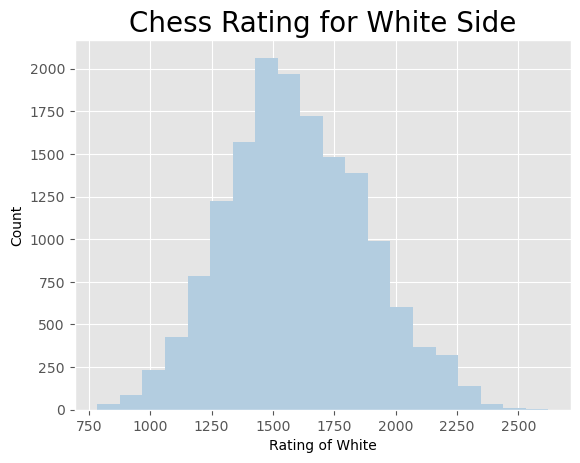

In [40]:
# Histogram for White Side Rating

plt.hist(df_rated['white_rating'], bins=20, color='#b3cde0')
plt.xlabel('Rating of White')
plt.ylabel('Count')
plt.title('Chess Rating for White Side', fontsize=20)

# Shows relatively normal distribution and gives a good idea of the ratings of different players
# Not using the df_rated_fixed dataframe for this as it's just a distribution, do not need to filter just yet

Text(0.5, 1.0, 'Chess Rating for Black Side')

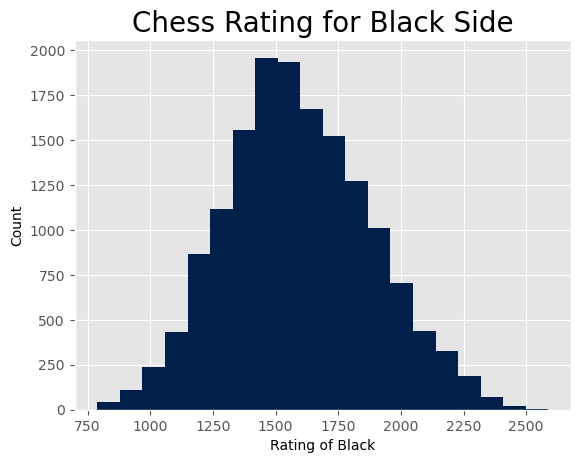

In [41]:
# Histogram for Black Side Rating

plt.hist(df_rated['black_rating'], bins=20, color='#011f4b')
plt.xlabel('Rating of Black')
plt.ylabel('Count')
plt.title('Chess Rating for Black Side', fontsize=20)

# Same insights as white side

Text(0.5, 1.0, 'Chess Rating Density for White Side')

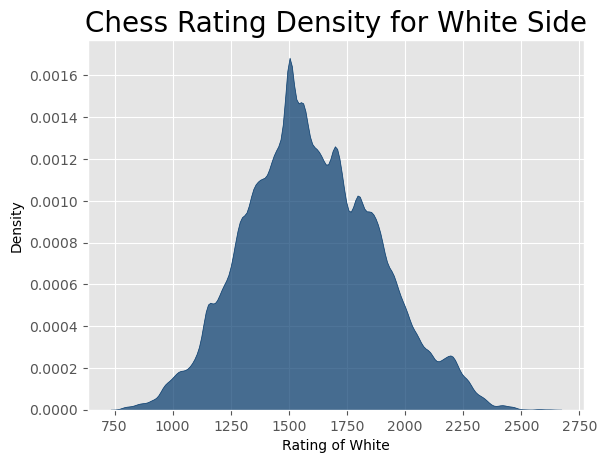

In [42]:
# Density Plot of White Rating

sns.kdeplot(data = df_rated['white_rating'], bw_method=0.06, color='#03396c', fill=True, alpha=.7)
plt.xlabel('Rating of White')
plt.ylabel('Density')

plt.title('Chess Rating Density for White Side', fontsize=20)

# Provides different insight opposed to the histogram

# Gives insight into the idea of maybe having rating 'break-points' that users want to achieve and maybe stop playing at

# Break-points such as 1700, 1800, 2200 that have a higher density of players

# Helps put 1500 starting ranking into perspective

### 2.2 Frequency of Wins Loses and Draws <a class="anchor" id="ninth-bullet"></a>

Looking at the number of wins/loses/draws by color to see if white has an advantage going first. Would prefer to prove this with statistics but will just suggest insight via barplot visualization.

In [43]:
# Finding values of wins/loses/draws

win_lose_draw = df_rated_fixed['winner'].value_counts()
win_lose_draw

# Using the df_rated_fixed column to ensure the win/lose counts aren't skewed due to the rating difference being very high

white    9545
black    8680
draw      888
Name: winner, dtype: int64

In [44]:
# Making a custom color palette for the sns barplot below, hard to find good chess colors as white is hard to see  

custom_colors = {'white': '#b3cde0', 'black': '#011f4b', 'draw': '#808080'}

Text(0.5, 1.0, 'Wins by Color')

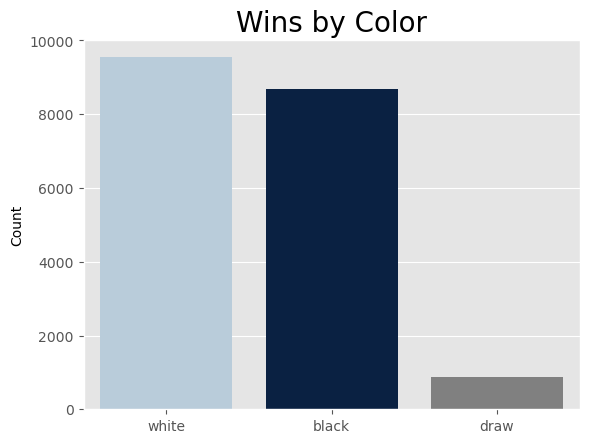

In [45]:
# Win/Lose/Draw Frequency Barplot

sns.barplot(x=win_lose_draw.index, y=win_lose_draw.values, palette=custom_colors)
plt.ylabel('Count')
plt.title('Wins by Color', fontsize=20)


# Suggests white might have slight advantage, but closer than I thought it would be!
# Suprisingly fair for such an old game!
# Some people consider a draw an unofficial "win" for black because tying at a disadvantage is a great outcome

### 2.3 Visualing Rating Difference <a class="anchor" id="tenth-bullet"></a>
Rating difference was not something I expected to do an in-depth analysis on but ended up being an important column to add. I did not expect Lichess to have the potential for large rating differences between players in rated games. These visualizations help put that difference into perspective and add insight into why I decided to use it for filtering the rated subset when doing the later opening analysis.

Text(0.5, 1.0, 'Rating Difference Between Opponents')

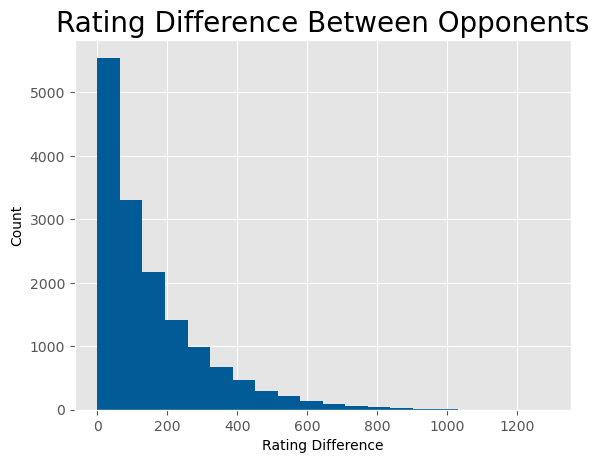

In [46]:
# Histogram of Rating Difference

plt.hist(df_rated['rating_difference_abs'], bins=20, color='#005b96')
plt.xlabel('Rating Difference')
plt.ylabel('Count')
plt.title('Rating Difference Between Opponents', fontsize=20)

Text(0.5, 1.0, 'Rating Difference Between Opponents')

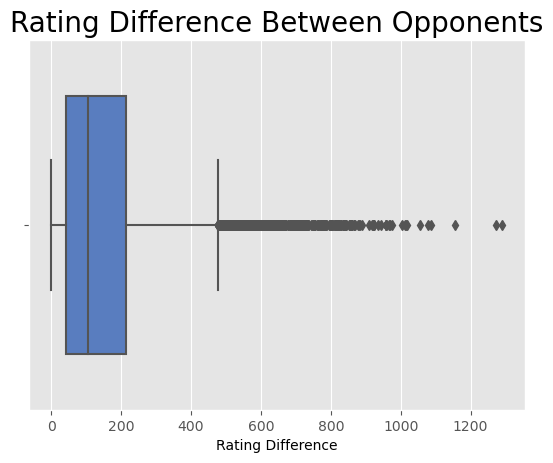

In [47]:
# Using a Boxplot as well to better visualize any outliers

sns.boxplot(data=df_rated, x='rating_difference_abs', orient='h', palette ='muted', width = 0.7)
plt.xlabel('Rating Difference')
plt.title('Rating Difference Between Opponents', fontsize=20)

In [48]:
# Descriptiong of Rating Difference

df_rated['rating_difference_abs'].describe()

count    15467.00000
mean       153.70117
std        155.05022
min          0.00000
25%         41.00000
50%        104.00000
75%        215.00000
max       1290.00000
Name: rating_difference_abs, dtype: float64

In [49]:
df_rated['rating_difference_abs'].median() #median calc

104.0

#### Describing Rating Difference

Mean of ~153.75 rating difference between opponents seems OK, not great. Preferance would obviously be it being as close to 0 as possible which I am sure Lichess tries to do. I am assuming the high rating differences are from the matchmaking system not able to find a player quick enough so they match players of higher difference to get players into games quicker.

Boxplot does show the high amount of outliers in the dataset though. Any difference above a 478.5 rating difference is considered an outlier. Calculation for maximum of boxplot = (Q3 + 1.5*IQR) IQR = 216 - 42 = 175 -> (216 + 1.5 * 175) = 478.5.

The high amount of outliers are making the standard deviation large as well at a value of 155.49. Because of this the median might be a more robust measure of centrality. 

Maximum value is also very high at 1290 rating difference in a rated game.

This is why I filtered the data above in "df_rated_fix" to exclude the outliers for later analysis. Going to look at the winrates between the outlier rating difference group and the normal difference group to further justify the exclusion.

### 2.4 Making Rating Difference Subsets to Calculate Winrates <a class="anchor" id="eleventh-bullet"></a>

In [50]:
# Making a high difference and low difference subsets

df_high_dif = df_rated[df_rated['rating_difference_abs'] >= 479]
df_low_dif = df_rated[df_rated['rating_difference_abs'] <= 479]

In [51]:
df_high_dif.head(5)

id  rated    created_at  last_move_at  turns victory_status winner  \
26   Wf0zuLQQ   True  1.502780e+12  1.502780e+12     43         resign  white   
35   lHNM8cl5   True  1.502430e+12  1.502430e+12     19         resign  black   
36   GfeEgLV3   True  1.502430e+12  1.502430e+12     28         resign  white   
78   Mi1AmkiI   True  1.503620e+12  1.503620e+12     47         resign  black   
121  XPZikam7   True  1.503500e+12  1.503500e+12     59           mate  white   

    increment_code           white_id  white_rating           black_id  \
26           10+10       gmcarlsen403          1825  shivangithegenius   
35            10+0  shivangithegenius           976           sorethea   
36            10+0             rico21          1569  shivangithegenius   
78            15+5           oldpaths          1579     iris_foxspring   
121           10+0               cdvh          1706             dashy1   

     black_rating                                              moves  \
26           1079  e4 e5 Nf3 Nc6 d4 exd4 Bc4 Bc5 c3 dxc3 Bxf7+ Kx...   
35           1832  d4 g6 e4 Bg7 Bf4 e6 Bc4 Ne7 Nf3 h6 Ne5 O-O Qg4...   
36            978  d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Bf5 Bd3 Bxd...   
78           2105  d4 d5 Bf4 Nf6 Nf3 e6 e3 Bd6 Bg3 O-O Bd3 b6 Nbd...   
121           925  d4 d5 Nf3 Nf6 Bf4 Nc6 e3 Bf5 Bb5 e6 Ne5 Bb4+ c...   

    opening_eco                                  opening_name  opening_ply  \
26          C45                      Scotch Game: Haxo Gambit            8   
35          B06                     Robatsch (Modern) Defense            4   
36          D00  Blackmar-Diemer Gambit: Tartakower Variation           10   
78          D02              Queen's Pawn Game: London System            5   
121         D02              Queen's Pawn Game: London System            5   

                   opening_new          variation_new       style  \
26                 Scotch Game            Haxo Gambit   Defensive   
35   Robatsch (Modern) Defense                   None   Defensive   
36      Blackmar-Diemer Gambit   Tartakower Variation  Aggressive   
78           Queen's Pawn Game          London System  Aggressive   
121          Queen's Pawn Game          London System  Aggressive   

    opening_color  avg_rating  rating_group  win_lose   winrate  games_played  \
26          White      1452.0  Intermediate         1  0.541950           441   
35          Black      1404.0      Beginner         1  0.425000            40   
36          White      1273.5      Beginner         1  0.520000            50   
78          White      1842.0        Master         0  0.470356          1012   
121         White      1315.5      Beginner         1  0.470356          1012   

     rating_difference  rating_difference_abs  
26                 746                    746  
35                -856                    856  
36                 591                    591  
78                -526                    526  
121                781                    781

In [52]:
# To calculate winrates for each group need to find the number of wins per color
# But need to make sure I only do the winrates for each color where they have the higher rating, thus the high difference

df_high_dif_white_wins = df_high_dif[(df_high_dif['white_rating'] > df_high_dif['black_rating']) &
                                (df_high_dif['winner'] == 'white')]
df_low_dif_white_wins = df_low_dif[(df_low_dif['white_rating'] > df_low_dif['black_rating']) &
                                (df_low_dif['winner'] == 'white')]

In [53]:
df_high_dif_white_wins

id  rated    created_at  last_move_at  turns victory_status  \
26     Wf0zuLQQ   True  1.502780e+12  1.502780e+12     43         resign   
36     GfeEgLV3   True  1.502430e+12  1.502430e+12     28         resign   
121    XPZikam7   True  1.503500e+12  1.503500e+12     59           mate   
461    afXDSWwS   True  1.503080e+12  1.503080e+12     11         resign   
474    BAKj62Jt   True  1.502900e+12  1.502900e+12     15           mate   
...         ...    ...           ...           ...    ...            ...   
18646  9A1dfrVB   True  1.503335e+12  1.503337e+12     57         resign   
18740  Epwf67Ta   True  1.502043e+12  1.502044e+12     39           mate   
18943  PhuVpH8p   True  1.504182e+12  1.504183e+12     59           mate   
18946  QROA1woS   True  1.504180e+12  1.504180e+12     51         resign   
19097  5Fx8GBTL   True  1.500156e+12  1.500157e+12     53         resign   

      winner increment_code       white_id  white_rating           black_id  \
26     white          10+10   gmcarlsen403          1825  shivangithegenius   
36     white           10+0         rico21          1569  shivangithegenius   
121    white           10+0           cdvh          1706             dashy1   
461    white            5+5  fischerdipper          1646          underhman   
474    white           10+3  fischerdipper          1678             coco31   
...      ...            ...            ...           ...                ...   
18646  white          30+30           mrjv          1511         kylecuver1   
18740  white          45+45         oldtom          1616         kylecuver1   
18943  white            7+2           da19          2087      anastasia2009   
18946  white           10+0         kroupy          2141      anastasia2009   
19097  white          10+10   kevineclmans          1759           jamboger   

       black_rating                                              moves  \
26             1079  e4 e5 Nf3 Nc6 d4 exd4 Bc4 Bc5 c3 dxc3 Bxf7+ Kx...   
36              978  d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Bf5 Bd3 Bxd...   
121             925  d4 d5 Nf3 Nf6 Bf4 Nc6 e3 Bf5 Bb5 e6 Ne5 Bb4+ c...   
461             939             d4 d5 c4 c6 e3 f6 Nf3 e6 cxd5 cxd5 Nc3   
474            1148  e4 e5 d4 exd4 c3 dxc3 Bc4 cxb2 Bxb2 Nf6 e5 Nh5...   
...             ...                                                ...   
18646           997  e4 c5 Nf3 Nc6 d4 d6 dxc5 dxc5 Qxd8+ Nxd8 Bb5+ ...   
18740           998  e4 e5 Nf3 Nc6 Bc4 Qe7 Nc3 Nf6 d3 h6 O-O a6 b3 ...   
18943          1572  e4 e5 Nf3 Nf6 d4 exd4 e5 Ne4 Bd3 d5 exd6 Nxd6 ...   
18946          1574  e4 e5 Bc4 Nf6 d3 Bc5 Ne2 Ng4 O-O Qh4 h3 Nxf2 R...   
19097          1265  e4 d6 d4 Nf6 Nc3 Nbd7 f4 e5 Nf3 Be7 dxe5 dxe5 ...   

      opening_eco                                  opening_name  opening_ply  \
26            C45                      Scotch Game: Haxo Gambit            8   
36            D00  Blackmar-Diemer Gambit: Tartakower Variation           10   
121           D02              Queen's Pawn Game: London System            5   
461           D10                                  Slav Defense            4   
474           C21   Danish Gambit Accepted |  Classical Defense           10   
...           ...                                           ...          ...   
18646         B32                        Sicilian Defense: Open            5   
18740         C50                                  Italian Game            5   
18943         C43                         Petrov: Modern Attack            6   
18946         C24              Bishop's Opening: Berlin Defense            4   
19097         B07    Lion Defense: Anti-Philidor |  Lion's Cave            8   

                                       opening_new  \
26                                     Scotch Game   
36                          Blackmar-Diemer Gambit   
121                              Queen's Pawn Game   
461                                   Slav Defense   
474    Danish Gambit Accepted |

In [54]:
# Doing the number of loses now, same as number of wins filtering

df_high_dif_white_loses = df_high_dif[(df_high_dif['white_rating'] > df_high_dif['black_rating']) &
                                (df_high_dif['winner'] == 'black')]
df_low_dif_white_loses = df_low_dif[(df_low_dif['white_rating'] > df_low_dif['black_rating']) &
                                (df_low_dif['winner'] == 'black')]

In [55]:
df_high_dif_white_loses

id  rated    created_at  last_move_at  turns victory_status  \
978    j6KBt6J0   True  1.500600e+12  1.500600e+12     34         resign   
1070   XNMbvz8v   True  1.504170e+12  1.504170e+12     70           mate   
1432   8VrFmBra   True  1.503710e+12  1.503710e+12     17         resign   
2006   zHLyaVIM   True  1.499970e+12  1.499970e+12     72         resign   
2416   swHS9wgg   True  1.502920e+12  1.502920e+12     74         resign   
3014   4LPlgruA   True  1.486840e+12  1.486840e+12     41         resign   
3015   cEw0VsfY   True  1.486840e+12  1.486840e+12     50         resign   
3682   pxGP8sl7   True  1.482780e+12  1.482780e+12     70         resign   
3683   W2OyM88q   True  1.482780e+12  1.482780e+12     12         resign   
4107   QHrQCRDT   True  1.491240e+12  1.491240e+12      2         resign   
4802   6Q01zumr   True  1.473180e+12  1.473180e+12     22         resign   
5481   Z5bwx2wW   True  1.465250e+12  1.465250e+12     54         resign   
6061   sPBuKOpj   True  1.468860e+12  1.468860e+12     22         resign   
6141   InSwV99D   True  1.463160e+12  1.463160e+12     18           mate   
7143   62tftBDD   True  1.502210e+12  1.502210e+12    166           mate   
7193   t1SiyzCM   True  1.461330e+12  1.461330e+12     82      outoftime   
7781   J9wpsS4u   True  1.446950e+12  1.446950e+12     36      outoftime   
8095   2HrHCRXy   True  1.440300e+12  1.440300e+12     62         resign   
8450   zuf8CWMT   True  1.445480e+12  1.445480e+12     68           mate   
8643   oPbyfVXB   True  1.433980e+12  1.433980e+12     54         resign   
9592   XdtidcM9   True  1.416240e+12  1.416240e+12      2      outoftime   
10091  4MiUKjQ0   True  1.408852e+12  1.408853e+12     36           mate   
11313  qTC6H6FY   True  1.502756e+12  1.502757e+12     60           mate   
11320  516BT5yk   True  1.501445e+12  1.501446e+12    120         resign   
12560  yHEq1Acf   True  1.495622e+12  1.495623e+12     78      outoftime   
12808  4UUccNCx   True  1.497872e+12  1.497873e+12     42         resign   
12912  ohcusYZc   True  1.504466e+12  1.504466e+12      4      outoftime   
13205  VWRFBB4x   True  1.504083e+12  1.504085e+12     52      outoftime   
13919  RO9X83G1   True  1.500571e+12  1.500572e+12    150      outoftime   
14642  JsbyIJxA   True  1.503137e+12  1.503138e+12     88         resign   
15372  DTs7W2yv   True  1.502925e+12  1.502925e+12     20         resign   
16153  zg5AA1BM   True  1.504357e+12  1.504357e+12     68         resign   
17089  IeUoeV7s   True  1.502861e+12  1.502861e+12     52         resign   

      winner increment_code          white_id  white_rating          black_id  \
978    black            5+6  aidenleahycrooks          1862         carloshrc   
1070   black           10+0      superhero098          1997  miqomanukyan2001   
1432   black            5+5              sesh          1678        poetrunner   
2006   black           5+30         sanskar99          1547     mimirilinguis   
2416   black          15+14          toni4127          1923     chessandgrace   
3014   black           10+0     theanimal1990          1916           hus1972   
3015   black           10+0           andry69          1788           hus1972   
3682   black           10+0            kupres          1880          piley159   
3683   black           10+0        nanang8231          1807          piley159   
4107   black          10+10          chingisl          1610      greenmachine   
4802   black            9+5        ulunlawang          1698        andreschil   
5481   black            5+8          nescau12          2009            ytdvvc   
6061   black           10+0     adictochesser          1963           rohanms   
6141   black           20+3        nuffsaidm8          1680            pawnsy   
7143   black           10+0      first-time-1          2267     woodcrusher75   
7193   black           20+0          hambiadi          2139         hungcuong   
7781   black           10+0         lawrenman      

In [56]:
# Doing the same for black side

df_high_dif_black_wins = df_high_dif[(df_high_dif['black_rating'] > df_high_dif['white_rating']) &
                                (df_high_dif['winner'] == 'black')]

In [57]:
df_high_dif_black_wins

id  rated    created_at  last_move_at  turns victory_status  \
35     lHNM8cl5   True  1.502430e+12  1.502430e+12     19         resign   
78     Mi1AmkiI   True  1.503620e+12  1.503620e+12     47         resign   
203    dJEtAQp7   True  1.503750e+12  1.503750e+12     28         resign   
216    dFQ5D7CS   True  1.503580e+12  1.503580e+12    112           mate   
223    xRY7h8aS   True  1.503340e+12  1.503340e+12     88      outoftime   
...         ...    ...           ...           ...    ...            ...   
18822  FFaBql0W   True  1.502446e+12  1.502446e+12     30         resign   
18849  gTFN7mrQ   True  1.502911e+12  1.502912e+12     44           mate   
18964  MqXMaILz   True  1.503999e+12  1.504000e+12    156           mate   
18992  zeFMJF8U   True  1.502604e+12  1.502606e+12     54           mate   
19096  B4IEyQyb   True  1.500157e+12  1.500158e+12     58           mate   

      winner increment_code           white_id  white_rating        black_id  \
35     black           10+0  shivangithegenius           976        sorethea   
78     black           15+5           oldpaths          1579  iris_foxspring   
203    black            7+2            taranga          1289   hknight_chess   
216    black           10+0            taranga          1281         naoufel   
223    black           10+0            taranga          1222        madara21   
...      ...            ...                ...           ...             ...   
18822  black          25+15             dimak8           860        artur799   
18849  black           10+0           cheflodi          1293       loukas435   
18964  black           10+0      anastasia2009          1568           fntms   
18992  black          30+30            vevochi           880     spiteknight   
19096  black          10+10           jamboger          1263    kevineclmans   

       black_rating                                              moves  \
35             1832  d4 g6 e4 Bg7 Bf4 e6 Bc4 Ne7 Nf3 h6 Ne5 O-O Qg4...   
78             2105  d4 d5 Bf4 Nf6 Nf3 e6 e3 Bd6 Bg3 O-O Bd3 b6 Nbd...   
203            2108  e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 Nc3 Be7 d4 exd4 N...   
216            1765  e4 e5 Nf3 d6 Bc4 Be7 d3 Nf6 Ng5 O-O Nxf7 Rxf7 ...   
223            1732  e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 d6 Nxc6 bxc6 b4 Nf6...   
...             ...                                                ...   
18822          1424  d4 d5 e3 Bf5 Bb5+ c6 Bxc6+ Nxc6 Qh5 Qd7 e4 Bxe...   
18849          1827  e3 f5 Qf3 g6 Bc4 Nf6 g4 Nxg4 Qd5 e6 Qf3 Ne5 Qe...   
18964          2067  e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Nxd4 Qxd4 d6 Bc4 Nf...   
18992          1651  e4 c5 Bc4 d6 d3 Nf6 Nf3 a6 O-O b5 Bxf7+ Kxf7 N...   
19096          1770  d4 d5 Bf4 Bf5 e3 Nf6 c3 e6 Nf3 Nh5 Bg5 f6 Bh4 ...   

      opening_eco                                     opening_name  \
35            B06                        Robatsch (Modern) Defense   
78            D02                 Queen's Pawn Game: London System   
203           C77  Ruy Lopez: Morphy Defense |  Tarrasch Variation   
216           C41                              Philidor Defense #4   
223           B32                        Sicilian Defense: Open #3   
...           ...                                              ...   
18822         D00                             Queen's Pawn Game #2   
18849         A00                             Van't Kruijs Opening   
18964         C45                                      Scotch Game   
18992         B20                 Sicilian Defense: Bowdler Attack   
19096         D00                  Queen's Pawn Game: Mason Attack   

       opening_ply                opening_new  \
35               4  Robatsch (Modern) Defense   
78               5          Queen's Pawn Game   
203              9                  Ruy Lopez   
216              6        Philidor Defense #4   
223              7           Sicilian Defense   
...            ...                        ...   
18822            3       Queen's Pawn Game #2   
18849            

In [58]:
# Black side loses

df_high_dif_black_loses = df_high_dif[(df_high_dif['black_rating'] > df_high_dif['white_rating']) &
                                (df_high_dif['winner'] == 'white')]

In [59]:
df_high_dif_black_loses

id  rated    created_at  last_move_at  turns victory_status  \
593    s8b6pWX3   True  1.504110e+12  1.504110e+12     31         resign   
678    D9vtX3w9   True  1.500610e+12  1.500610e+12    107         resign   
1577   rqcPeu3M   True  1.504260e+12  1.504260e+12     25           mate   
2199   VYayBOPY   True  1.487390e+12  1.487390e+12     89           mate   
2202   Lput0yVc   True  1.487390e+12  1.487390e+12     35           mate   
3681   ZeB3CkfP   True  1.482780e+12  1.482780e+12     61         resign   
4108   RzfhITm1   True  1.491240e+12  1.491240e+12      3         resign   
4169   6dzSqqDm   True  1.491420e+12  1.491420e+12     13           mate   
4182   2guqueuz   True  1.479420e+12  1.479420e+12     57           mate   
4431   s92mywrk   True  1.491330e+12  1.491330e+12      3         resign   
4539   cd1DWtOo   True  1.472690e+12  1.472690e+12     71           mate   
5150   Yxn9MK2o   True  1.467410e+12  1.467410e+12     43         resign   
5963   0KNwyYKl   True  1.459580e+12  1.459590e+12     99         resign   
6567   RDEhRYEf   True  1.484830e+12  1.484830e+12     41           mate   
6682   bl1lsXgi   True  1.455170e+12  1.455170e+12     83           mate   
6866   8Bq7xzPR   True  1.465190e+12  1.465190e+12    103           mate   
7091   8qKkGCR2   True  1.489280e+12  1.489280e+12     17         resign   
7167   IBjy9wiJ   True  1.450550e+12  1.450550e+12    101      outoftime   
7643   FLeozIu7   True  1.445380e+12  1.445380e+12     85         resign   
7757   ZdoDhyEV   True  1.443080e+12  1.443080e+12     49           mate   
8357   F7rKotGj   True  1.481170e+12  1.481170e+12     43         resign   
9194   WwkpkV7P   True  1.422300e+12  1.422300e+12    151      outoftime   
9212   xJyhfWO9   True  1.422210e+12  1.422210e+12      1         resign   
9597   39RyjZ7h   True  1.416145e+12  1.416146e+12     33         resign   
9896   BBN3eAFK   True  1.415721e+12  1.415722e+12     47         resign   
10271  748YuMa6   True  1.490410e+12  1.490414e+12    125      outoftime   
10565  6IrjVPc0   True  1.396102e+12  1.396103e+12     53           mate   
11316  HlwkqfH2   True  1.501448e+12  1.501448e+12     69         resign   
11317  itLTZ0AT   True  1.501447e+12  1.501448e+12    101           mate   
11318  uOHTBAzi   True  1.501447e+12  1.501447e+12     57         resign   
11688  WQu88j99   True  1.501446e+12  1.501446e+12     37         resign   
12496  OjGhMkmy   True  1.499595e+12  1.499597e+12     81      outoftime   
12607  9uY3lNxz   True  1.501313e+12  1.501313e+12     73      outoftime   
12706  cH1lJBLW   True  1.498157e+12  1.498158e+12     51           mate   
12933  kr18QbLR   True  1.500503e+12  1.500504e+12     52         resign   
13084  DaZK321M   True  1.504379e+12  1.504380e+12     97           mate   
13742  6xsGO2yT   True  1.499625e+12  1.499625e+12     12         resign   
14740  VH1H3hRX   True  1.483146e+12  1.483147e+12    127           mate   
15384  keCmwER7   True  1.468785e+12  1.468786e+12     59         resign   
17099  22muVVIz   True  1.504297e+12  1.504297e+12     83         resign   
17289  q8s8EaeD   True  1.503156e+12  1.503157e+12     37         resign   
17531  vmnq5ucy   True  1.489967e+12  1.489969e+12     60         resign   
17570  IFanZ6Do   True  1.502387e+12  1.502388e+12    103           mate   

      winner increment_code           white_id  white_rating  \
593    white           10+0           elcortez          1265   
678    white           10+5          oilen1401          1609   
1577   white           10+0      a_p_t_e_m_u_u          1295   
2199   white          30+30             dead23          1293   
2202   white            8+0           dsom1234          1500   
3681   white           10+0           piley159          1344   
4108   white          10+10       greenmachine           989   
4169   white            6+3          samuelpro          1002   
4182   white           5+10          samuelpro           856   
4431   white           12+0 

In [60]:
# Doing the length of each subset to find the total numbers

total_white_wins = len(df_high_dif_white_wins)
total_black_wins = len(df_high_dif_black_wins)
total_games_high_dif = len(df_high_dif)
total_white_losses = len(df_high_dif_white_loses)
total_black_losses = len(df_high_dif_black_loses)
total_white_wins_low = len(df_low_dif_white_wins)
total_white_losses_low = len(df_low_dif_white_loses)

In [61]:
#Calculating the Win Rate Proportion for Each Group

# High Difference

high_dif_white_wins_prop = total_white_wins / (total_white_wins + total_white_losses)
high_dif_black_wins_prop = total_black_wins / (total_black_wins + total_black_losses)

# Low Difference

low_dif_white_wins_prop = total_white_wins_low / (total_white_wins_low + total_white_losses_low)

In [62]:
# High difference total games for white side

total_white_wins + total_white_losses

373

In [63]:
# Low difference total games for white side

total_white_wins_low + total_white_losses_low

7144

In [64]:
#In the low difference subset, when white has a higher rating than black the win rate is ~65%

low_dif_white_wins_prop

0.6552351623740201

In [65]:
#In the high difference subset, when white has a higher rating than black the win rate is ~91%

high_dif_white_wins_prop

# This seems like a very large difference

0.9115281501340483

In [66]:
#In the high difference subset, when black has a higher rating than white the win rate is ~88%

high_dif_black_wins_prop

# Another very high winrate

0.8859416445623343

In [67]:
# Making sure the winrate proportions add up correctly to 1.00
# Double checking by doing the proportion of losses

high_dif_white_losses_prop = total_white_losses / (total_white_wins + total_white_losses)
high_dif_black_losses_prop = total_black_losses / (total_black_wins + total_black_losses)

print(high_dif_white_losses_prop)
print(high_dif_black_losses_prop)

0.08847184986595175
0.11405835543766578


In [68]:
#(.652-.908) / (0.667*(1-0.667)(1/7395+1/469)**.5) = zscore of -29.450

### 2.5 Visualization of Rating Difference Against Number of Turns <a class="anchor" id="twelfth-bullet"></a>

Trying to include a scatterplot because I have a very limited amount of numerical data. Looking to see if the high rating differences affect number of turns in a game. Would expect the higher the rating difference the less amount of turns in the game there will be. 

In [69]:
# Making a subset that only has one time increment code, so the number of turns are not all over the place
# Could possibly do a scatterplot matrix for all the increment codes, maybe for future work

df_ten_min = df_rated[df_rated['increment_code'] == '10+0']

In [70]:
df_ten_min

id  rated    created_at  last_move_at  turns victory_status  \
6      qwU9rasv   True  1.504230e+12  1.504230e+12     33         resign   
9      afoMwnLg   True  1.503440e+12  1.503440e+12    119           mate   
23     UhXXBOMY   True  1.502950e+12  1.502950e+12     36         resign   
24     mCij4hBq   True  1.502860e+12  1.502860e+12     13         resign   
35     lHNM8cl5   True  1.502430e+12  1.502430e+12     19         resign   
...         ...    ...           ...           ...    ...            ...   
19105  nYOvevdh   True  1.499814e+12  1.499814e+12      9      outoftime   
19109  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
19110  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
19111  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
19112  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code            white_id  white_rating  \
6      white           10+0             capa_jr          1520   
9      white           10+0  daniel_likes_chess          1381   
23     white           10+0          robotsmoke          1307   
24     black           10+0   shivangithegenius          1113   
35     black           10+0   shivangithegenius           976   
...      ...            ...                 ...           ...   
19105  white           10+0            jamboger          1243   
19109  black           10+0            jamboger          1233   
19110  white           10+0            jamboger          1219   
19111  white           10+0        marcodisogno          1360   
19112  black           10+0            jamboger          1235   

                 black_id  black_rating  \
6      daniel_likes_chess          1423   
9                 mirco25          1209   
23      shivangithegenius          1106   
24        ivangonzalez123          1423   
35               sorethea          1832   
...                   ...           ...   
19105     yamaguchipolgar          1142   
19109  farrukhasomiddinov          1196   
19110        schaaksmurf3          1286   
19111            jamboger          1227   
19112               ffbob          1339   

                                                   moves opening_eco  \
6      d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...         D00   
9      e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...         B01   
23     c4 Nc6 Nc3 e5 g3 Bc5 Bg2 Nge7 e3 b6 a3 Bb7 b4 ...         A25   
24      e4 c5 d4 cxd4 Qxd4 Nc6 Qa4 e5 Be3 Nf6 Nf3 h6 Nc3         B21   
35     d4 g6 e4 Bg7 Bf4 e6 Bc4 Ne7 Nf3 h6 Ne5 O-O Qg4...         B06   
...                                                  ...         ...   
19105                  c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4         A20   
19109  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...         A41   
19110  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...         D00   
19111  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...         B07   
19112  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...         D00   

                                            opening_name  opening_ply  \
6             Blackmar-Diemer Gambit: Pietrowsky Defense           10   
9          Scandinavian Defense: Mieses-Kotroc Variation            4   
23     English Opening: King's English Variation |  R...            4   
24               Sicilian Defense: Smith-Morra Gambit #2            3   
35                             Robatsch (Modern) Defense            4   
...                                                  ...          ...   
19105          English Opening: King's English Variation            2   
19109                                       Queen's Pawn            2   
19110                    Queen's Pawn Game: Mason Attack            3   
19111                                       Pirc Defense            4   
19112                    Queen's Pawn Game: Mason Attack            3   

                     opening_new  \
6         Blackmar-Dieme

Text(0.5, 1.0, 'Rating Difference vs. Number of Turns in 10 Minute Games')

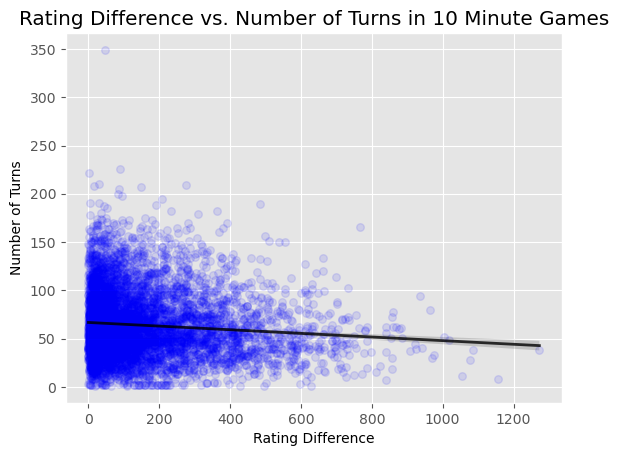

In [71]:
#Scatter Plot rating difference vs turns

sns.regplot(x = "rating_difference_abs", 
            y = "turns", 
            scatter_kws = {'s': 30, 'color': 'blue', 'alpha': 0.1}, 
            fit_reg=True, 
            line_kws = {'color': 'black', 'linestyle': 'solid','linewidth': 2, 'alpha': 0.8}, 
            data = df_ten_min)

plt.xlabel('Rating Difference')
plt.ylabel('Number of Turns')
plt.title('Rating Difference vs. Number of Turns in 10 Minute Games')

### Looking into Different Increment Codes for Scatterplot Matrix
Will not include this, does not look as good as just the regular scatterplot and not enough variables to look at to warrant using a scatterplot matrix. This is good to know for future work involving more numerical variables.

In [72]:
increment_count = df_rated['increment_code'].value_counts()
increment_count

10+0     6502
15+0      928
15+15     698
5+5       557
5+8       516
         ... 
18+19       1
45+8        1
60+10       1
90+5        1
40+30       1
Name: increment_code, Length: 349, dtype: int64

In [73]:
top_three_increments = ['10+0', '15+0', '15+15']

In [74]:
df_increments = df_rated[df_rated['increment_code'].isin(top_three_increments)]
df_increments.head(2)

id  rated    created_at  last_move_at  turns victory_status winner  \
6  qwU9rasv   True  1.504230e+12  1.504230e+12     33         resign  white   
8  dwF3DJHO   True  1.503510e+12  1.503510e+12     66         resign  black   

  increment_code   white_id  white_rating            black_id  black_rating  \
6           10+0    capa_jr          1520  daniel_likes_chess          1423   
8           15+0  ehabfanri          1439  daniel_likes_chess          1392   

                                               moves opening_eco  \
6  d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...         D00   
8  e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...         C50   

                                 opening_name  opening_ply  \
6  Blackmar-Diemer Gambit: Pietrowsky Defense           10   
8       Italian Game: Schilling-Kostic Gambit            6   

              opening_new             variation_new       style opening_color  \
6  Blackmar-Diemer Gambit        Pietrowsky Defense  Aggressive         White   
8            Italian Game   Schilling-Kostic Gambit   Defensive         White   

   avg_rating  rating_group  win_lose   winrate  games_played  \
6      1471.5  Intermediate         1  0.520000            50   
8      1415.5  Intermediate         0  0.490281           926   

   rating_difference  rating_difference_abs  
6                 97                     97  
8                 47                     47

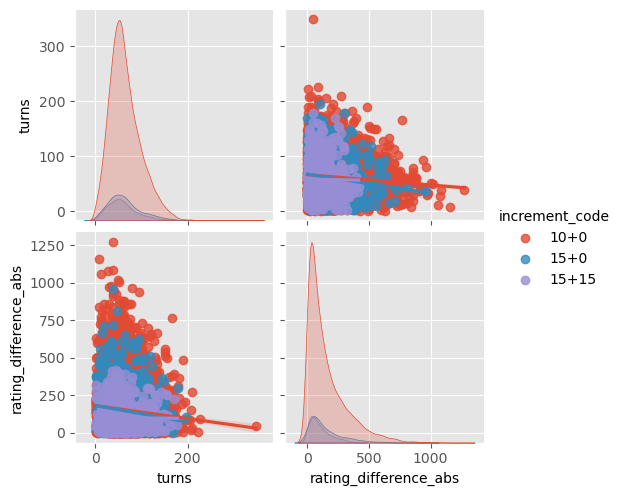

In [75]:
sns.pairplot(df_increments, vars=['turns', 'rating_difference_abs'], hue='increment_code', hue_order=top_three_increments, kind = "reg")

#### Looking at the Very High Turn Game
Curious about it, how can a game go over 300 turns in just 10 minutes!?

In [76]:
# Looking at the 349 turn game outlier

long_game = df_rated[df_rated["turns"] >= 300]

In [77]:
# Looking at the 349 turn game outlier closer

long_game

# will be good to bring up maybe, one of longest games ive ever seen

id  rated    created_at  last_move_at  turns victory_status  \
11409  pN0ioHNr   True  1.503084e+12  1.503086e+12    349      outoftime   

      winner increment_code white_id  white_rating black_id  black_rating  \
11409  white           10+0   shiwen          2194    kijek          2240   

                                                   moves opening_eco  \
11409  d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...         D30   

                                      opening_name  opening_ply  \
11409  Queen's Gambit Declined: Hastings Variation           13   

                   opening_new        variation_new      style opening_color  \
11409  Queen's Gambit Declined   Hastings Variation  Defensive         White   

       avg_rating rating_group  win_lose   winrate  games_played  \
11409      2217.0      Top 10%         1  0.533156           377   

       rating_difference  rating_difference_abs  
11409                -46                     46

In [78]:
# Correlation Coefficient between turns and rating difference

corr_coefficient = df_ten_min['rating_difference_abs'] .corr(df_ten_min['turns'])
round(corr_coefficient, 3)

# extremely weak inverse relationship but plot is definitely not the best due to outliers
# also probably not accurate as people resign before all the turns are actually played

-0.09

### 2.6 Exploring Openings <a class="anchor" id="thirteenth-bullet"></a>
Exploring the openings and getting basic visualizations for them. Showing the most popular openings across the dataset, and showinge scope of the openings by showing how many variations each opening can have.

In [79]:
# Filtering the df_counts dataframe to only show openings played over 210 times for bar chart usage

df_counts_filt = df_counts[df_counts["games_played"]>210]
df_counts_filt

opening  games_played
0          Sicilian Defense          2473
1            French Defense          1258
2         Queen's Pawn Game          1012
3              Italian Game           926
4          King's Pawn Game           871
5                 Ruy Lopez           812
6           English Opening           699
7      Scandinavian Defense           688
8         Caro-Kann Defense           559
9               Scotch Game           441
10  Queen's Gambit Declined           377
11        Four Knights Game           344
12     Van't Kruijs Opening           342
13              Indian Game           312
14         Bishop's Opening           310
15        Zukertort Opening           298
16         Philidor Defense           263
17   Queen's Gambit Refused           244
18             Russian Game           242
19  Queen's Gambit Accepted           242
20           Modern Defense           219

#### Top 20 Chess Openings Overall Barplot

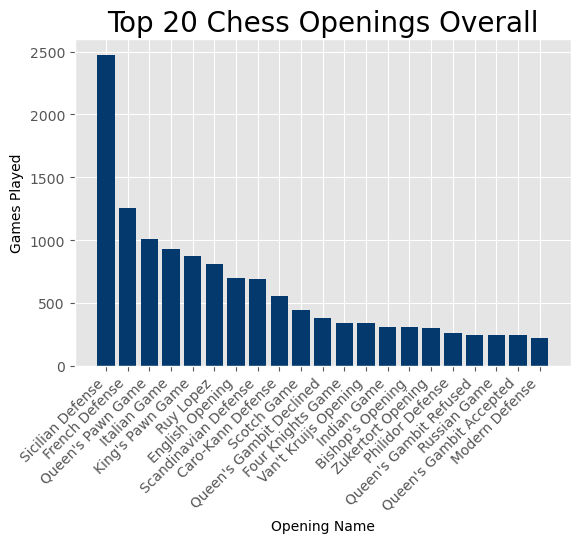

In [80]:
plt.bar(df_counts_filt.opening, df_counts_filt.games_played, color='#03396c')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)
plt.xlabel('Opening Name')
plt.ylabel('Games Played')
plt.title('Top 20 Chess Openings Overall', fontsize=20)
plt.show()

#only showing the top 20 out of the 227 unique openings

#### Sankey Diagram for Variations
Gives scale to variations per opening.

In [81]:
# Looking at Top 5 Openings to show in the sankey

top_5_openings = df_chess['opening_new'].value_counts().head(5)
top_5_openings

Sicilian Defense     2473
French Defense       1258
Queen's Pawn Game    1012
Italian Game          926
King's Pawn Game      871
Name: opening_new, dtype: int64

In [82]:
# Sankey Diagram of Top 5 openings_new + filtered Variations_new for each\
    #could not include all variations because it became unreadable


# Finding opening and variation frequency and filtering it by >1000 and >10 respectively (might change)

opening_frequency = df_chess['opening_new'].value_counts().reset_index()
opening_frequency.columns = ['Opening', 'Frequency']
opening_frequency = opening_frequency[opening_frequency['Frequency'] > 950]

variation_frequency = df_chess['variation_new'].value_counts().reset_index()
variation_frequency.columns = ['Variation', 'Frequency']
variation_frequency = variation_frequency[variation_frequency['Frequency'] >= 15]

# Combining the Opening and Variation Frequency

frequency_data = pd.concat([opening_frequency, variation_frequency], ignore_index=True)

# Settings

nodes = pd.Index(frequency_data['Opening'].append(frequency_data['Variation']).unique())
sources = nodes.get_indexer(df_chess['opening_new'])
targets = nodes.get_indexer(df_chess['variation_new'])
values = frequency_data['Frequency']

# Plotting

fig = go.Figure(data=[go.Sankey(node=dict(pad=10, thickness=20, line=dict(color='black', width=0.5), label=nodes),
    link=dict(source=sources, target=targets, value=values))])

# Layout Args

fig.update_layout(title_text="Top 4 Chess Openings and their Variations", font_size=11.5)
fig.show()

C:\Users\teste\AppData\Local\Temp\ipykernel_4108\2220846952.py:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nodes = pd.Index(frequency_data['Opening'].append(frequency_data['Variation']).unique())


## 3. Openings Analysis and Visualization <a class="anchor" id="fourteenth-bullet"></a>

### 3.1 Finding Popular Aggressive and Defensive Openings <a class="anchor" id="fifteenth-bullet"></a>
Looking to see if one style is more popular and which one has higher winrates.

In [83]:
# Looking at counts of openings
frequency_data

Opening  Frequency                  Variation
0     Sicilian Defense       2473                        NaN
1       French Defense       1258                        NaN
2    Queen's Pawn Game       1012                        NaN
3                  NaN        298           Normal Variation
4                  NaN        292         Exchange Variation
..                 ...        ...                        ...
172                NaN         15     Icelandic-Palme Gambit
173                NaN         15           Austrian Defense
174                NaN         15   Delayed Alapin Variation
175                NaN         15               Beyer Gambit
176                NaN         15       Schlechter Variation

[177 rows x 3 columns]

In [84]:
# Mapping "style" dictionary to df_wr_counts dataframe

df_wr_counts['style'] = df_wr_counts['opening_new'].map(categorized_openings)

In [85]:
df_wr_counts

opening_new   winrate  games_played       style
0             Alekhine Defense  0.410112           178   Defensive
1          Alekhine Defense #2  0.333333             3         NaN
2          Alekhine Defense #3  1.000000             1   Defensive
3                 Amar Opening  0.500000            12  Aggressive
4                Amazon Attack  0.333333             6  Aggressive
..                         ...       ...           ...         ...
222               Wade Defense  0.500000             2   Defensive
223               Ware Defense  0.666667            12   Defensive
224               Ware Opening  0.375000            24   Defensive
225  Yusupov-Rubinstein System  0.473684            19   Defensive
226          Zukertort Opening  0.540268           298  Aggressive

[227 rows x 4 columns]

In [86]:
# Filtering df_wr_counts dataframe to show only openings with over 250 games and winrates above 0.5 (positive winrate)

df_opens_filt_high = df_wr_counts[
    (df_wr_counts["games_played"]>250) & 
    (df_wr_counts["winrate"]>0.5) & 
    (df_wr_counts['style'])]

df_opens_filt_high

opening_new   winrate  games_played       style
20          Bishop's Opening  0.580645           310  Aggressive
58           English Opening  0.550787           699   Defensive
65         Four Knights Game  0.523256           344  Aggressive
178  Queen's Gambit Declined  0.533156           377   Defensive
195                Ruy Lopez  0.520936           812   Defensive
199              Scotch Game  0.541950           441   Defensive
226        Zukertort Opening  0.540268           298  Aggressive

In [87]:
# Finding Popular Defensive Openings with Positive WR

df_opens_def = df_wr_counts[df_wr_counts['style'] == 'Defensive']

df_opens_filt_high_def = df_opens_def[
    (df_opens_def["games_played"]>250) & 
    (df_opens_def["winrate"]>0.5)]

df_opens_filt_high_def

opening_new   winrate  games_played      style
58           English Opening  0.550787           699  Defensive
178  Queen's Gambit Declined  0.533156           377  Defensive
195                Ruy Lopez  0.520936           812  Defensive
199              Scotch Game  0.541950           441  Defensive

In [88]:
# Description of defensive openings to compare to Aggressive ones

df_opens_def.describe()

winrate  games_played
count  127.000000    127.000000
mean     0.494508    106.614173
std      0.225104    283.198373
min      0.000000      1.000000
25%      0.398113      4.500000
50%      0.480000     20.000000
75%      0.554319     71.500000
max      1.000000   2473.000000

In [89]:
# Sorting for horizontal bar graph, highest to lowest WR

df_opens_filt_high_def = df_opens_filt_high_def.sort_values(by='winrate', ascending=True)

#### Popular Defensive Openings with Positive WR Horizontal Bar Graph

Text(0.5, 1.0, 'Popular Defensive Positive WR Openings')

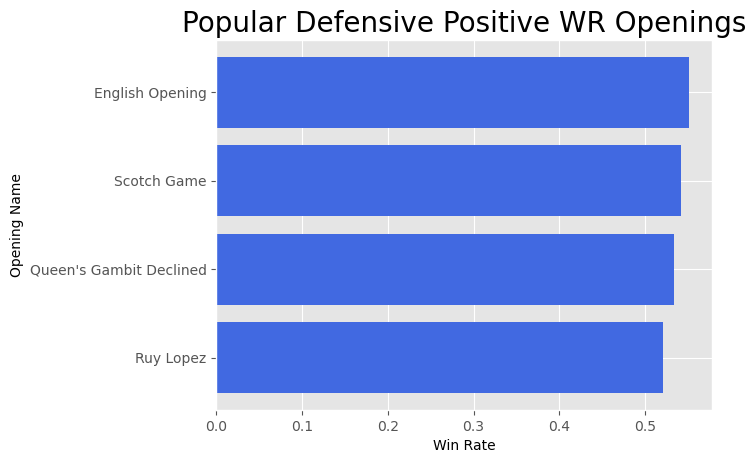

In [90]:
# Plotting Popular Defensive Openings

plt.barh(df_opens_filt_high_def.opening_new, df_opens_filt_high_def.winrate, color='#4169E1')
plt.xlabel('Win Rate')
plt.ylabel('Opening Name')
plt.title('Popular Defensive Positive WR Openings', fontsize=20)

In [91]:
# Doing the Same for Aggressive Openings

df_opens_agg = df_wr_counts[df_wr_counts['style'] == 'Aggressive']

df_opens_filt_high_agg = df_opens_agg[(df_opens_agg["games_played"]>250) & 
                                      (df_opens_agg["winrate"]>0.5)
                                     ]
df_opens_filt_high_agg

opening_new   winrate  games_played       style
20    Bishop's Opening  0.580645           310  Aggressive
65   Four Knights Game  0.523256           344  Aggressive
226  Zukertort Opening  0.540268           298  Aggressive

In [92]:
# Description of defensive openings to compare to Aggressive ones

df_opens_agg.describe()

winrate  games_played
count  96.000000     96.000000
mean    0.533679     54.916667
std     0.312581    150.933214
min     0.000000      1.000000
25%     0.373988      2.000000
50%     0.521628      6.500000
75%     0.718407     23.000000
max     1.000000   1012.000000

In [93]:
# Sorting for horizontal bar graph, highest to lowest WR

df_opens_filt_high_agg = df_opens_filt_high_agg.sort_values(by='winrate', ascending=True)

#### Popular Aggresive Openings with Positive WR Horizontal Bar Graph

Text(0.5, 1.0, 'Popular Aggressive Positive WR Openings')

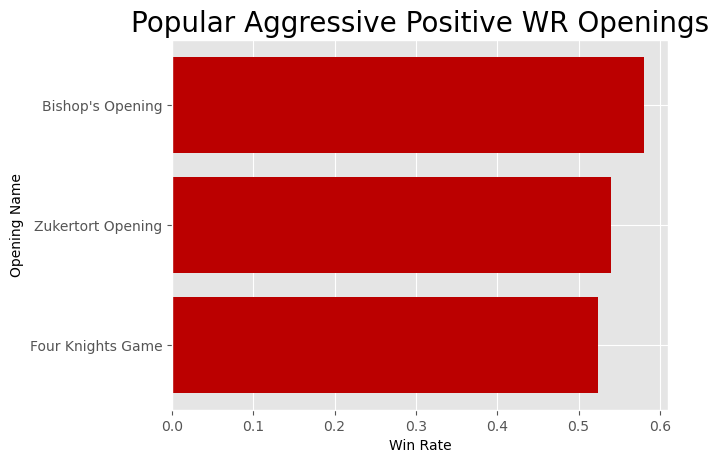

In [94]:
# Plotting Popular Aggressive Openings

plt.barh(df_opens_filt_high_agg.opening_new, df_opens_filt_high_agg.winrate, color='#BB0000')
plt.xlabel('Win Rate')
plt.ylabel('Opening Name')
plt.title('Popular Aggressive Positive WR Openings', fontsize=20)

## Same filtering as defensive openings, much fewer
## Maybe suggests defensive openings have more options or are better suited for high winrates overall

##### Calculate overall average of winrates for defensive vs offensive openings 
    # would help confirm above graphs

### 3.2 Looking at Openings In Different Rating Groups <a class="anchor" id="sixteenth-bullet"></a>
Going to be focusing on the beginner rating group and the top 10% of players in rating to see the difference between the openings they play, the winrates they have for those openings, and the styles they tend to play.

#### Top 10% Rating Bracket

In [95]:
# Creating DF's for Top 10% Rating Group

df_top_10 = df_rated_fixed[df_rated_fixed['rating_group'] == 'Top 10%']
df_top_10.head(3)

id  rated    created_at  last_move_at  turns victory_status winner  \
364  e4UoYNOg   True  1.503980e+12  1.503980e+12     40         resign  black   
569  HDH18gtj   True  1.504280e+12  1.504280e+12     58         resign  black   
570  lHNSzBps   True  1.504270e+12  1.504270e+12     34         resign  black   

    increment_code           white_id  white_rating       black_id  \
364           10+0  joselito-carnaval          1780   arjunshenoyk   
569           10+0           brodskay          1984  roman12342005   
570           10+0      roman12342005          1954        rindu38   

     black_rating                                              moves  \
364          2132  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 a3 Nbd7 B...   
569          1948  e4 g6 d4 Bg7 Nc3 d6 Be2 Nf6 Be3 O-O Qd2 c6 h3 ...   
570          2158  e4 c5 Nc3 d6 f4 Nc6 Bb5 Bd7 Nf3 e6 O-O Nf6 d3 ...   

    opening_eco                         opening_name  opening_ply  \
364         B90  Sicilian Defense: Najdorf Variation           10   
569         B06     Modern Defense: Standard Defense            6   
570         B23   Sicilian Defense: Closed Variation            3   

          opening_new       variation_new      style opening_color  \
364  Sicilian Defense   Najdorf Variation  Defensive         Black   
569    Modern Defense    Standard Defense  Defensive         Black   
570  Sicilian Defense    Closed Variation  Defensive         Black   

     avg_rating rating_group  win_lose   winrate  games_played  \
364      1956.0      Top 10%         1  0.495754          2473   
569      1966.0      Top 10%         1  0.506849           219   
570      2056.0      Top 10%         1  0.495754          2473   

     rating_difference  rating_difference_abs  
364               -352                    352  
569                 36                     36  
570               -204                    204

In [96]:
# Checking code to make sure WR's calculated correctly

df_top_10_test = df_top_10[df_top_10['opening_new'] == 'Alekhine Defense']
df_top_10_test.head(10)

id  rated    created_at  last_move_at  turns victory_status  \
1526   n983jruV   True  1.496350e+12  1.496350e+12     80           mate   
7544   AZXH3eAB   True  1.495070e+12  1.495070e+12     55         resign   
9677   W6tcwpLO   True  1.487694e+12  1.487695e+12     46           mate   
12223  SUFD5DcK   True  1.502714e+12  1.502717e+12    127         resign   
13316  ip8OPXQ6   True  1.503675e+12  1.503675e+12      2         resign   
18664  Ss4k5BZz  False  1.503251e+12  1.503253e+12     41         resign   

      winner increment_code          white_id  white_rating   black_id  \
1526   black           10+0           skulll1          1693  massaggro   
7544   white           10+0      willyjohnson          2241    yunibar   
9677   black           10+0    nomadic_george          1948  sugarmike   
12223  white          25+10  almostmastermind          2169    lolmens   
13316  black           10+0     networkchess2          2029   filixius   
18664  white          15+10         kferapont          2136   razorboy   

       black_rating                                              moves  \
1526           2287  e4 Nf6 Nf3 Nxe4 Be2 d5 O-O c5 d4 cxd4 Qxd4 Nc6...   
7544           2244  e4 Nf6 e5 Nd5 d4 d6 c4 Nb6 exd6 cxd6 Nf3 Bg4 h...   
9677           1978  e4 Nf6 d3 e5 g3 Bc5 Bg2 O-O h3 Nc6 Ne2 d5 exd5...   
12223          2002  e4 Nf6 e5 Nd5 d4 d6 c4 Nb6 exd6 exd6 Nc3 Nc6 N...   
13316          2025                                             e4 Nf6   
18664          2243  e4 Nf6 Nc3 d5 exd5 Nxd5 g3 e5 Nge2 Nc6 Bg2 Be6...   

      opening_eco                              opening_name  opening_ply  \
1526          B02       Alekhine Defense: John Tracy Gambit            3   
7544          B03      Alekhine Defense: Exchange Variation            9   
9677          B02       Alekhine Defense: Maroczy Variation            3   
12223         B03      Alekhine Defense: Exchange Variation            9   
13316         B02                          Alekhine Defense            2   
18664         B02  Alekhine Defense: Scandinavian Variation            4   

            opening_new            variation_new      style opening_color  \
1526   Alekhine Defense        John Tracy Gambit  Defensive         Black   
7544   Alekhine Defense       Exchange Variation  Defensive         Black   
9677   Alekhine Defense        Maroczy Variation  Defensive         Black   
12223  Alekhine Defense       Exchange Variation  Defensive         Black   
13316  Alekhine Defense                     None  Defensive         Black   
18664  Alekhine Defense   Scandinavian Variation  Defensive         Black   

       avg_rating rating_group  win_lose   winrate  games_played  \
1526       1990.0      Top 10%         1  0.410112           178   
7544       2242.5      Top 10%         0  0.410112           178   
9677       1963.0      Top 10%         1  0.410112           178   
12223      2085.5      Top 10%         0  0.410112           178   
13316      2027.0      Top 10%         1  0.410112           178   
18664      2189.5      Top 10%         0  0.410112           178   

       rating_difference  rating_difference_abs  
1526                -594                    594  
7544                  -3                      3  
9677                 -30                     30  
12223                167                    167  
13316                  4                      4  
18664               -107                    107

In [97]:
# Fixed Win Rate Calc

wins_count = df_top_10.groupby('opening_new')['win_lose'].sum()
total_rows = df_top_10.groupby('opening_new').size()
losses_count = total_rows - wins_count

total_games_played = wins_count + losses_count

In [98]:
# Finding winrates in rating group

df_top_10_grouped = df_top_10.groupby('opening_new')['win_lose'].mean()
df_top_10_grouped

opening_new
Alekhine Defense             0.500
Amar Opening                 1.000
Anderssen Opening            1.000
Barnes Defense               1.000
Benko Gambit                 0.400
                             ...  
Vienna Game #2               0.500
Ware Defense                 0.000
Ware Opening                 1.000
Yusupov-Rubinstein System    0.000
Zukertort Opening            0.625
Name: win_lose, Length: 144, dtype: float64

In [99]:
# Reseting index and merging df's

df_top_10_grouped = df_top_10_grouped.reset_index()
df_top_10_grouped = df_top_10_grouped.merge(total_games_played.rename('total_games'), on='opening_new')

In [100]:
#Checking to make sure grouping worked

df_top_10_grouped

opening_new  win_lose  total_games
0             Alekhine Defense     0.500            6
1                 Amar Opening     1.000            1
2            Anderssen Opening     1.000            2
3               Barnes Defense     1.000            1
4                 Benko Gambit     0.400            5
..                         ...       ...          ...
139             Vienna Game #2     0.500            2
140               Ware Defense     0.000            1
141               Ware Opening     1.000            1
142  Yusupov-Rubinstein System     0.000            2
143          Zukertort Opening     0.625           32

[144 rows x 3 columns]

In [101]:
#Filtering by total games over 35 to get rid of bad value WR's

df_top_10_grouped_filt = df_top_10_grouped[df_top_10_grouped["total_games"]>=70]
df_top_10_grouped_filt

opening_new  win_lose  total_games
21   Caro-Kann Defense  0.412500           80
38     English Opening  0.561224           98
45      French Defense  0.468531          143
55        Italian Game  0.416667           72
108  Queen's Pawn Game  0.423913           92
117          Ruy Lopez  0.453608           97
123   Sicilian Defense  0.466292          356

In [102]:
df_top_10_grouped_filt['style'] = df_top_10_grouped_filt['opening_new'].map(categorized_openings)
df_top_10_grouped_filt

C:\Users\teste\AppData\Local\Temp\ipykernel_4108\2488894220.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



opening_new  win_lose  total_games       style
21   Caro-Kann Defense  0.412500           80   Defensive
38     English Opening  0.561224           98   Defensive
45      French Defense  0.468531          143   Defensive
55        Italian Game  0.416667           72   Defensive
108  Queen's Pawn Game  0.423913           92  Aggressive
117          Ruy Lopez  0.453608           97   Defensive
123   Sicilian Defense  0.466292          356   Defensive

In [103]:
# Sorting for horizontal bar graph, highest to lowest WR

df_top_10_grouped_filt = df_top_10_grouped_filt.sort_values(by='win_lose', ascending=False)

Text(0.5, 1.0, 'Popular Openings in Top 10% Rating')

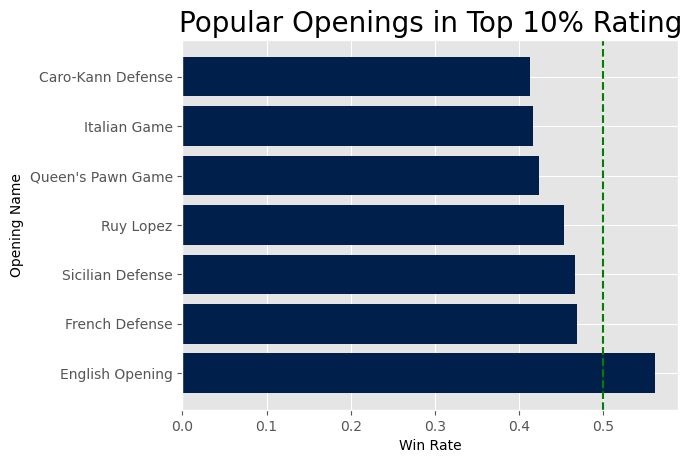

In [104]:
# Plotting Popular High WR Openings in top 10% Openings

plt.barh(df_top_10_grouped_filt.opening_new, df_top_10_grouped_filt.win_lose, color='#011f4b')
plt.axvline(x=0.5, linestyle='dashed', color='green')
plt.xlabel('Win Rate')
plt.ylabel('Opening Name')
plt.title('Popular Openings in Top 10% Rating', fontsize=20)

In [105]:
# Another custom palette for sns barplot

agg_def_colors = ['#4169E1', '#BB0000']

#### Popular Openings in the Top 10% Rating Bracket Barplot

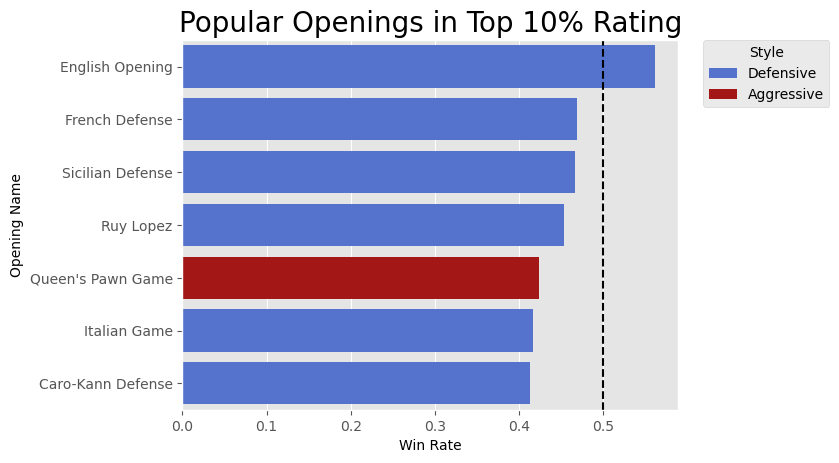

In [106]:
sns.barplot(x = 'win_lose', y = 'opening_new', data = df_top_10_grouped_filt, 
            hue = 'style', dodge=False, palette = agg_def_colors)

plt.axvline(x=0.5, linestyle='dashed', color='black')
plt.xlabel('Win Rate')
plt.ylabel('Opening Name')
plt.title('Popular Openings in Top 10% Rating', fontsize=20)
plt.legend(title = 'Style', fontsize = '7', title_fontsize='8')
plt.legend(title = 'Style', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# added an axis line on the x-axis to show where positive and negative winrate cutoff is

#### Intermediate Rating Bracket

In [107]:
### Creating DF's for Intermediate Rating Group

df_begin = df_rated_fixed[df_rated_fixed['rating_group'] == 'Intermediate']
df_begin.head(3)

id  rated    created_at  last_move_at  turns victory_status winner  \
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_eco  \
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   

                             opening_name  opening_ply        opening_new  \
2   King's Pawn Game: Leonardis Variation            3   King's Pawn Game   
3  Queen's Pawn Game: Zukertort Variation            3  Queen's Pawn Game   
4                        Philidor Defense            5   Philidor Defense   

          variation_new       style opening_color  avg_rating  rating_group  \
2   Leonardis Variation  Aggressive         White      1498.0  Intermediate   
3   Zukertort Variation  Aggressive         White      1446.5  Intermediate   
4                  None   Defensive         Black      1496.0  Intermediate   

   win_lose   winrate  games_played  rating_difference  rating_difference_abs  
2         1  0.485649           871                 -4                      4  
3         1  0.470356          1012                -15                     15  
4         0  0.342205           263                 54                     54

In [108]:
# Winrate calc for Intermediate group

wins_count_begin = df_begin.groupby('opening_new')['win_lose'].sum()
total_rows_begin = df_begin.groupby('opening_new').size()
losses_count_begin = total_rows_begin - wins_count_begin

total_games_played_begin = wins_count_begin + losses_count_begin

In [109]:
# Grouping new DF by opening and win_lose ratio

df_begin_grouped = df_begin.groupby('opening_new')['win_lose'].mean()
df_begin_grouped

opening_new
Alekhine Defense             0.347826
Alekhine Defense #3          1.000000
Amar Opening                 0.666667
Amazon Attack                0.500000
Anderssen Opening            1.000000
                               ...   
Vienna Game                  0.476190
Ware Defense                 0.666667
Ware Opening                 0.375000
Yusupov-Rubinstein System    0.400000
Zukertort Opening            0.444444
Name: win_lose, Length: 169, dtype: float64

In [110]:
# Merging and index reset

df_begin_grouped = df_begin_grouped.reset_index()
df_begin_grouped = df_begin_grouped.merge(total_games_played.rename('total_games'), on='opening_new')

df_begin_grouped # checking

opening_new  win_lose  total_games
0             Alekhine Defense  0.347826            6
1                 Amar Opening  0.666667            1
2            Anderssen Opening  1.000000            2
3               Barnes Defense  0.333333            1
4                 Benko Gambit  1.000000            5
..                         ...       ...          ...
114                Vienna Game  0.476190            6
115               Ware Defense  0.666667            1
116               Ware Opening  0.375000            1
117  Yusupov-Rubinstein System  0.400000            2
118          Zukertort Opening  0.444444           32

[119 rows x 3 columns]

In [111]:
# Filtering the same as Top 10% group

df_begin_grouped_filt = df_begin_grouped[df_begin_grouped["total_games"]>=70]
df_begin_grouped_filt

opening_new  win_lose  total_games
11   Caro-Kann Defense  0.518797           80
25     English Opening  0.527523           98
32      French Defense  0.474403          143
42        Italian Game  0.482639           72
87   Queen's Pawn Game  0.474903           92
95           Ruy Lopez  0.520362           97
100   Sicilian Defense  0.470588          356

In [112]:
df_begin_grouped_filt['style'] = df_begin_grouped_filt['opening_new'].map(categorized_openings)

C:\Users\teste\AppData\Local\Temp\ipykernel_4108\3352776384.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
df_begin_grouped_filt

opening_new  win_lose  total_games       style
11   Caro-Kann Defense  0.518797           80   Defensive
25     English Opening  0.527523           98   Defensive
32      French Defense  0.474403          143   Defensive
42        Italian Game  0.482639           72   Defensive
87   Queen's Pawn Game  0.474903           92  Aggressive
95           Ruy Lopez  0.520362           97   Defensive
100   Sicilian Defense  0.470588          356   Defensive

In [114]:
df_begin_grouped_filt = df_begin_grouped_filt.sort_values(by='win_lose', ascending=False)

Text(0.5, 1.0, 'Popular Openings in Intermediate Rating')

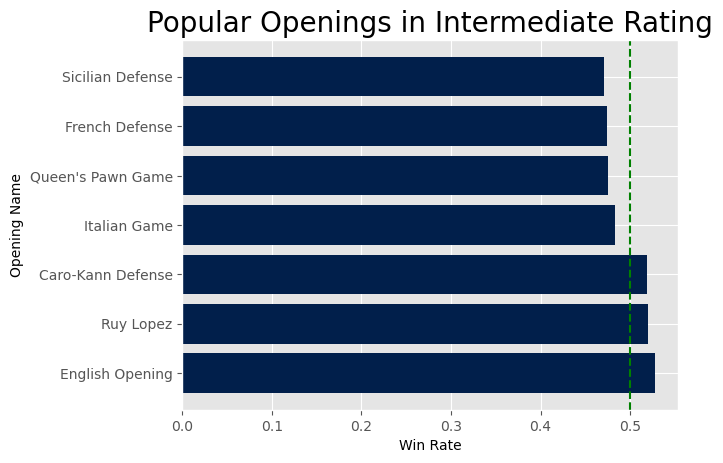

In [115]:
# Plotting Popular High WR Openings in Intermediate Bracket

plt.barh(df_begin_grouped_filt.opening_new, df_begin_grouped_filt.win_lose, color='#011f4b')
plt.axvline(x=0.5, linestyle='dashed', color='green')
plt.xlabel('Win Rate')
plt.ylabel('Opening Name')
plt.title('Popular Openings in Intermediate Rating', fontsize=20)

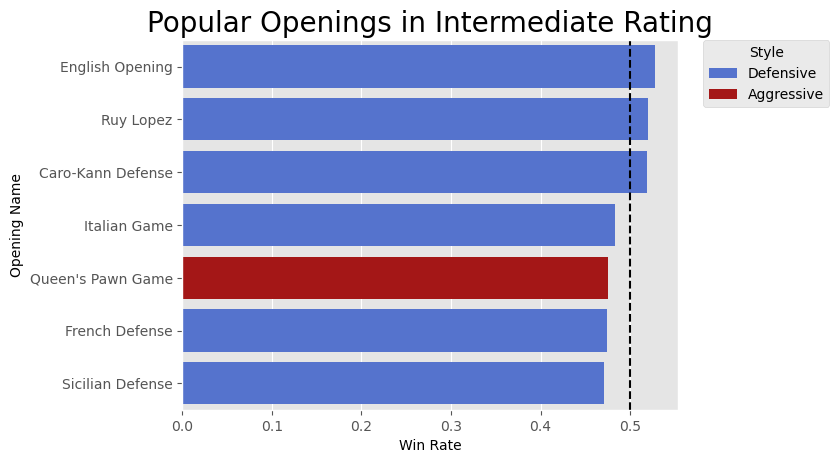

In [116]:
# Making same bar plot as top 10% but for the Intermediate rating bracket

sns.barplot(x = 'win_lose', y = 'opening_new', data = df_begin_grouped_filt, 
            hue = 'style', dodge=False, palette = agg_def_colors)

plt.axvline(x=0.5, linestyle='dashed', color='black')
plt.xlabel('Win Rate')
plt.ylabel('Opening Name')
plt.title('Popular Openings in Intermediate Rating', fontsize=20)
plt.legend(title = 'Style', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 3.3 Checkmate Frequency Analysis <a class="anchor" id="seventeenth-bullet"></a>
Looking at which styles and openings provide the highest amount of checkmates. This is also a way for me to confirm that ChatGPT correctly categorized the openings styles because aggressive openings should have a higher proportion of checkmates when compared to defensive openings. One feature of aggressive openings is their ability to checkmate quickly and put pressure on the opponent.

In [117]:
df_mate_count_opens = df_rated_fixed.groupby('opening_new')['victory_status'].apply(lambda x: (x == 'mate').sum()).reset_index(name='mate_count')
df_mate_count_opens

opening_new  mate_count
0             Alekhine Defense          63
1          Alekhine Defense #2           1
2          Alekhine Defense #3           0
3                 Amar Opening           3
4                Amazon Attack           2
..                         ...         ...
222               Wade Defense           1
223               Ware Defense           6
224               Ware Opening           9
225  Yusupov-Rubinstein System           9
226          Zukertort Opening          90

[227 rows x 2 columns]

In [118]:
df_opening_count_ = df_rated_fixed['opening_new'].value_counts().reset_index(name='total_count')
df_opening_count_

index  total_count
0                                     Sicilian Defense         2473
1                                       French Defense         1258
2                                    Queen's Pawn Game         1012
3                                         Italian Game          926
4                                     King's Pawn Game          871
..                                                 ...          ...
222          King's Gambit Accepted |  Abbazia Defense            1
223       Danish Gambit Accepted |  Schlechter Defense            1
224          King's Gambit Accepted |  Hanstein Gambit            1
225       King's Gambit Accepted |  Rosentreter Gambit            1
226  King's Gambit |  Falkbeer Countergambit |  Mil...            1

[227 rows x 2 columns]

In [119]:
df_opening_count_.rename(columns={'index': 'opening_new'}, inplace=True)

In [120]:
df_opening_count_

opening_new  total_count
0                                     Sicilian Defense         2473
1                                       French Defense         1258
2                                    Queen's Pawn Game         1012
3                                         Italian Game          926
4                                     King's Pawn Game          871
..                                                 ...          ...
222          King's Gambit Accepted |  Abbazia Defense            1
223       Danish Gambit Accepted |  Schlechter Defense            1
224          King's Gambit Accepted |  Hanstein Gambit            1
225       King's Gambit Accepted |  Rosentreter Gambit            1
226  King's Gambit |  Falkbeer Countergambit |  Mil...            1

[227 rows x 2 columns]

In [121]:
df_mates_total_opening = df_mate_count_opens.merge(df_opening_count_, on='opening_new')

In [122]:
df_mates_total_opening

opening_new  mate_count  total_count
0             Alekhine Defense          63          178
1          Alekhine Defense #2           1            3
2          Alekhine Defense #3           0            1
3                 Amar Opening           3           12
4                Amazon Attack           2            6
..                         ...         ...          ...
222               Wade Defense           1            2
223               Ware Defense           6           12
224               Ware Opening           9           24
225  Yusupov-Rubinstein System           9           19
226          Zukertort Opening          90          298

[227 rows x 3 columns]

In [123]:
df_mates_total_opening['mate_proportion'] = df_mates_total_opening['mate_count'] / df_mates_total_opening['total_count']

In [124]:
df_mates_total_opening

opening_new  mate_count  total_count  mate_proportion
0             Alekhine Defense          63          178         0.353933
1          Alekhine Defense #2           1            3         0.333333
2          Alekhine Defense #3           0            1         0.000000
3                 Amar Opening           3           12         0.250000
4                Amazon Attack           2            6         0.333333
..                         ...         ...          ...              ...
222               Wade Defense           1            2         0.500000
223               Ware Defense           6           12         0.500000
224               Ware Opening           9           24         0.375000
225  Yusupov-Rubinstein System           9           19         0.473684
226          Zukertort Opening          90          298         0.302013

[227 rows x 4 columns]

In [125]:
df_mates_total_opening['style'] = df_mates_total_opening['opening_new'].map(categorized_openings)

In [126]:
df_mates_total_opening

opening_new  mate_count  total_count  mate_proportion  \
0             Alekhine Defense          63          178         0.353933   
1          Alekhine Defense #2           1            3         0.333333   
2          Alekhine Defense #3           0            1         0.000000   
3                 Amar Opening           3           12         0.250000   
4                Amazon Attack           2            6         0.333333   
..                         ...         ...          ...              ...   
222               Wade Defense           1            2         0.500000   
223               Ware Defense           6           12         0.500000   
224               Ware Opening           9           24         0.375000   
225  Yusupov-Rubinstein System           9           19         0.473684   
226          Zukertort Opening          90          298         0.302013   

          style  
0     Defensive  
1           NaN  
2     Defensive  
3    Aggressive  
4    Aggressive  
..          ...  
222   Defensive  
223   Defensive  
224   Defensive  
225   Defensive  
226  Aggressive  

[227 rows x 5 columns]

In [127]:
df_mates_total_opening_filt = df_mates_total_opening[(df_mates_total_opening['mate_proportion'] >= 0.35) &
                                                    (df_mates_total_opening['total_count'] >= 120)]

In [128]:
df_mates_total_opening_filt

opening_new  mate_count  total_count  mate_proportion  \
0         Alekhine Defense          63          178         0.353933   
19            Bird Opening          52          146         0.356164   
20        Bishop's Opening         109          310         0.351613   
65       Four Knights Game         123          344         0.357558   
79       Hungarian Opening          66          161         0.409938   
128  King's Knight Opening          68          175         0.388571   
130       King's Pawn Game         351          871         0.402985   
163    Philidor Defense #2          67          179         0.374302   
219   Van't Kruijs Opening         141          342         0.412281   
220            Vienna Game          52          126         0.412698   

          style  
0     Defensive  
19   Aggressive  
20   Aggressive  
65   Aggressive  
79   Aggressive  
128  Aggressive  
130  Aggressive  
163   Defensive  
219  Aggressive  
220   Defensive

In [129]:
df_mates_total_opening_filt = df_mates_total_opening_filt.sort_values(by='mate_proportion', ascending=False)

In [130]:
def_agg_colors = ['#BB0000', '#4169E1']

### Looking at Proportion of Checkmates Per Opening with Style Mapping

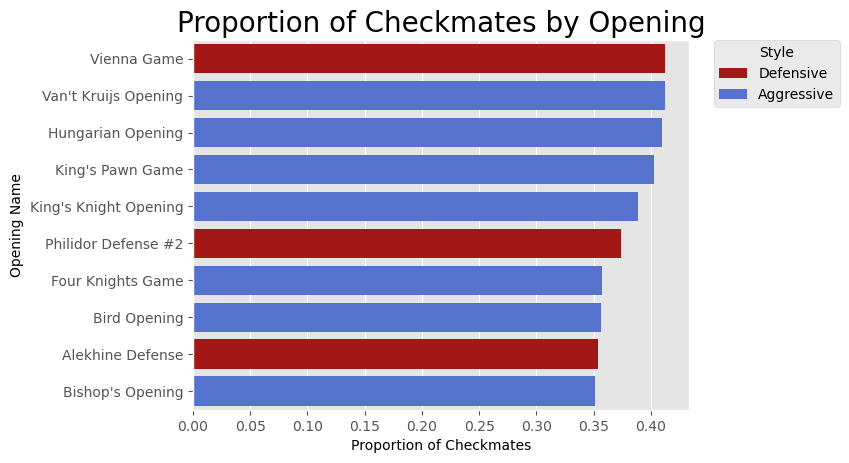

In [131]:
sns.barplot(x = 'mate_proportion', y = 'opening_new', 
            data = df_mates_total_opening_filt, 
            hue = 'style', 
            palette = def_agg_colors, dodge = False
           )

plt.xlabel('Proportion of Checkmates')
plt.ylabel('Opening Name')
plt.title('Proportion of Checkmates by Opening', fontsize=20)
plt.legend(title = 'Style', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Looking at overall Average of Checkmates Per Style

Aggressive = X

Defensive = Y

In [132]:
df_mates_avg = df_mates_total_opening.groupby("style").mean()

C:\Users\teste\AppData\Local\Temp\ipykernel_4108\2189178855.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [133]:
df_mates_avg #aggresive openings have 5% more mates on average pretty small number

mate_count  total_count  mate_proportion
style                                               
Aggressive   19.437500    54.916667         0.286536
Defensive    31.551181   106.614173         0.318812

### Looking At Checkmates Per Rating Group Overall

In [134]:
# Calculate checkmates per rating group

df_mate_count = df_rated_fixed.groupby('rating_group')['victory_status'].apply(lambda x: (x == 'mate').sum()).reset_index(name='mate_count')
df_mate_count

rating_group  mate_count
0      Beginner        1908
1  Intermediate        1795
2      Advanced        1311
3        Master         679
4       Top 10%         281

In [135]:
# Getting observation counts of rating groups in total

df_rating_count = df_rated_fixed['rating_group'].value_counts().reset_index(name='total_count')
df_rating_count

index  total_count
0  Intermediate         5089
1      Beginner         4680
2      Advanced         4532
3        Master         2901
4       Top 10%         1911

In [136]:
# Renaming index to rating_group to merge DF's correctly

df_rating_count.rename(columns={'index': 'rating_group'}, inplace=True)

In [137]:
# Checking

df_rating_count

rating_group  total_count
0  Intermediate         5089
1      Beginner         4680
2      Advanced         4532
3        Master         2901
4       Top 10%         1911

In [138]:
# Merging total_counts onto ratings/mates

df_mates_total = df_mate_count.merge(df_rating_count, on='rating_group')
df_mates_total

rating_group  mate_count  total_count
0      Beginner        1908         4680
1  Intermediate        1795         5089
2      Advanced        1311         4532
3        Master         679         2901
4       Top 10%         281         1911

In [139]:
# Proportion of Mates Calc
df_mates_total['mate_proportion'] = df_mates_total['mate_count'] / df_mates_total['total_count']

In [140]:
# Checking final DF

df_mates_total

rating_group  mate_count  total_count  mate_proportion
0      Beginner        1908         4680         0.407692
1  Intermediate        1795         5089         0.352722
2      Advanced        1311         4532         0.289276
3        Master         679         2901         0.234057
4       Top 10%         281         1911         0.147043

#### Proportion of Checkmates for each Rating Group Bar Graph

Text(0.5, 1.0, 'Proportion of Checkmates by Rating Group')

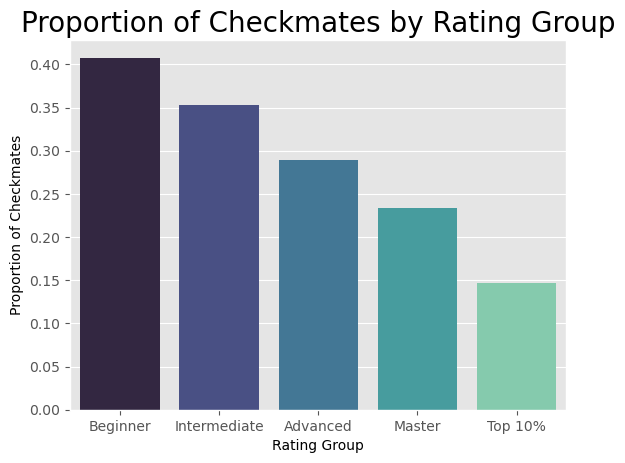

In [141]:
# Mate Proportion Bar Graph

sns.barplot(x = 'rating_group', y = 'mate_proportion', data = df_mates_total, palette = "mako")

plt.xlabel('Rating Group')
plt.ylabel('Proportion of Checkmates')
plt.title('Proportion of Checkmates by Rating Group', fontsize=20)


# Mates decrease as rating increases, interesting result
# Most likely because players with higher rating understand the game better so can see a mate incoming and resign before it happens
# Could also be higher rated = less chance of being mated but playing against equal skill player should even that out
# Lower rated played make more mistakes and do not see the mates coming against each other

### 3.4 Resign Frequency <a class="anchor" id="eighteenth-bullet"></a>
I thought as rating increased checkmates would increase. Maybe higher rated players see the checkmates or forced mates coming from a few moves away and resign instead of playing out the game.

In [142]:
df_resigns_count = df_rated_fixed.groupby('rating_group')['victory_status'].apply(lambda x: (x == 'resign').sum()).reset_index(name='resign_count')

In [143]:
df_resigns_count

rating_group  resign_count
0      Beginner          2248
1  Intermediate          2700
2      Advanced          2617
3        Master          1812
4       Top 10%          1318

In [144]:
df_resigns_total = df_resigns_count.merge(df_rating_count, on='rating_group')

In [145]:
df_resigns_total['resign_proportion'] = df_resigns_count['resign_count'] / df_mates_total['total_count']

In [146]:
# Total number of resigns
df_resigns_total

rating_group  resign_count  total_count  resign_proportion
0      Beginner          2248         4680           0.480342
1  Intermediate          2700         5089           0.530556
2      Advanced          2617         4532           0.577449
3        Master          1812         2901           0.624612
4       Top 10%          1318         1911           0.689691

#### Describing Resigns Table
Looks like resignations go up as the ratings increases. I think my theory of higher rated players resigned before the game is finished because they know it is not winnable may have some merit to it.